<a href="https://colab.research.google.com/github/DikshaBallav/Predict-Bug/blob/main/Capstone_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,4)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import (accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score)

from sklearn.preprocessing import LabelBinarizer

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import umap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from scipy.optimize import linear_sum_assignment



**IMPORT**

In [ ]:
eclipse_jdt = pd.read_csv("/content/eclipse_jdt.csv",delimiter=';')
eclipse_pde = pd.read_csv("/content/eclipse_pde.csv",delimiter=';')
equinox = pd.read_csv("/content/equinox.csv",delimiter=';')
lucene = pd.read_csv("/content/lucene.csv",delimiter=';')
mylyn = pd.read_csv("/content/mylyn.csv",delimiter=';')

**PREPROCESSING & ANALYSIS**

In [ ]:
print("NaNs in eclipse_jdt", np.sum(np.sum(eclipse_jdt.isna(), axis=0)) )
print("NaNs in eclipse_pde", np.sum(np.sum(eclipse_pde.isna(), axis=0)) )
print("NaNs in equinox", np.sum(np.sum(equinox.isna(), axis=0)) )
print("NaNs in lucene", np.sum(np.sum(lucene.isna(), axis=0)) )
print("NaNs in mylyn", np.sum(np.sum(mylyn.isna(), axis=0)) )

# drop nans
eclipse_pde.dropna(axis = 1, inplace=True)
equinox.dropna(axis = 1, inplace=True)
lucene.dropna(axis = 1, inplace=True)
mylyn.dropna(axis = 1, inplace=True)

NaNs in eclipse_jdt 0
NaNs in eclipse_pde 0
NaNs in equinox 0
NaNs in lucene 0
NaNs in mylyn 0


In [ ]:
print("Data Shapes:", eclipse_jdt.shape, eclipse_pde.shape, equinox.shape, lucene.shape, mylyn.shape)
df = pd.concat([eclipse_jdt, eclipse_pde, equinox, lucene, mylyn], ignore_index=True)
df.columns = df.columns.str.replace(' ', '')
print("Full dataframe shape:",df.shape, '\n')
print("Predictors:")
for name in df.columns.values[1:18].tolist():
    print(name, end=', ')
print("\n\nPredictable:", df.columns.values[18])

Data Shapes: (997, 24) (1497, 24) (324, 24) (691, 24) (1862, 24)
Full dataframe shape: (5371, 24) 

Predictors:
cbo, dit, fanIn, fanOut, lcom, noc, numberOfAttributes, numberOfAttributesInherited, numberOfLinesOfCode, numberOfMethods, numberOfMethodsInherited, numberOfPrivateAttributes, numberOfPrivateMethods, numberOfPublicAttributes, numberOfPublicMethods, rfc, wmc, 

Predictable: bugs


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   classname                    5371 non-null   object 
 1   cbo                          5371 non-null   int64  
 2   dit                          5371 non-null   int64  
 3   fanIn                        5371 non-null   int64  
 4   fanOut                       5371 non-null   int64  
 5   lcom                         5371 non-null   int64  
 6   noc                          5371 non-null   int64  
 7   numberOfAttributes           5371 non-null   int64  
 8   numberOfAttributesInherited  5371 non-null   int64  
 9   numberOfLinesOfCode          5371 non-null   float64
 10  numberOfMethods              5371 non-null   float64
 11  numberOfMethodsInherited     5371 non-null   int64  
 12  numberOfPrivateAttributes    5371 non-null   int64  
 13  numberOfPrivateMet

In [ ]:
df.describe()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,...,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs
count,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,...,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000
mean,9.650717,1.948985,4.077825,5.808229,131.440328,0.548687,5.648110,20.607522,119.126233,9.465649,...,1.515733,1.588903,6.271272,47.397133,28.291380,0.259914,0.041147,0.021225,0.003724,0.007261
std,15.430910,1.339559,12.763334,7.413065,1419.297581,2.320663,32.421878,75.447749,305.121926,13.519683,...,4.259624,30.836387,10.583760,100.978959,69.140371,0.880067,0.266681,0.158895,0.060914,0.089189
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,18.000000,3.000000,...,0.000000,0.000000,2.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,1.000000,1.000000,3.000000,15.000000,0.000000,2.000000,0.000000,47.000000,6.000000,...,0.000000,0.000000,4.000000,21.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,2.000000,3.000000,8.000000,55.000000,0.000000,5.000000,2.000000,115.000000,11.000000,...,1.000000,0.000000,7.000000,51.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,362.000000,9.000000,355.000000,93.000000,81003.000000,49.000000,2169.000000,563.000000,7509.000000,403.000000,...,111.000000,2168.000000,387.000000,2603.000000,1680.000000,28.000000,8.000000,3.000000,1.000000,2.000000


In [ ]:
df.head()

,classname,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,...,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
0,org::eclipse::jdt::internal::core::search::ind...,9,2,1,9,15,0,1,8,122.0,...,1.0,5,34.0,20.0,0,0,0,0,0,
1,org::eclipse::jdt::internal::compiler::codegen...,1,1,1,0,0,0,2,0,4.0,...,2.0,1,1.0,1.0,0,0,0,0,0,
2,org::eclipse::jdt::internal::compiler::ast::AS...,114,1,102,18,190,6,131,249,484.0,...,3.0,19,156.0,176.0,1,0,0,0,0,
3,org::eclipse::jdt::internal::compiler::lookup:...,5,6,1,4,10,0,0,61,33.0,...,0.0,4,18.0,12.0,0,0,0,0,0,
4,org::eclipse::jdt::internal::eval::CodeSnippet...,23,2,1,22,820,0,7,416,673.0,...,7.0,1,174.0,115.0,0,0,0,0,0,


In [ ]:
df.tail()

,classname,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,...,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,highPriorityBugs,
5366,org::eclipse::mylyn::internal::wikitext::tasks...,3,3,1,2,10,0,1,0,35.0,...,0.0,2,18.0,9.0,0,0,0,0,0,
5367,org::eclipse::mylyn::tasks::core::data::TaskDa...,14,1,14,0,1,8,1,0,0.0,...,0.0,2,2.0,0.0,0,0,0,0,0,
5368,org::eclipse::mylyn::internal::wikitext::ui::e...,9,1,3,6,55,2,4,0,63.0,...,0.0,7,32.0,18.0,1,0,0,0,0,
5369,org::eclipse::mylyn::internal::tasks::ui::noti...,11,2,3,8,105,2,5,0,106.0,...,0.0,14,36.0,37.0,0,0,0,0,0,
5370,org::eclipse::mylyn::tasks::core::data::TaskCo...,13,1,8,6,105,0,6,0,91.0,...,0.0,15,52.0,27.0,0,0,0,0,0,


In [ ]:
# Shuffle data before removing classname to keep mapping
df = df.sample(frac=1.0)

# Do not need confusing variables such as the class name; So it can used as an index or it can be left out
X = df.iloc[:, 1:-2]
y = df["bugs"]

print("X:", X.shape)
print("y:", y.shape)

X: (5371, 21)
y: (5371,)


In [ ]:
X.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,...,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs
852,14,3,1,13,21,0,0,22,231.0,7.0,...,0,1,0.0,1,74.0,53.0,0,0,0,0
3309,4,3,1,3,1,0,0,0,9.0,2.0,...,0,0,0.0,2,8.0,1.0,0,0,0,0
2363,2,1,1,1,1,0,1,0,20.0,2.0,...,0,0,1.0,1,4.0,6.0,0,0,0,0
1962,34,5,2,32,741,0,12,2,595.0,39.0,...,12,19,0.0,13,273.0,122.0,0,0,0,0
1169,33,3,5,29,378,0,1,1,255.0,28.0,...,1,2,0.0,11,151.0,71.0,2,0,0,0


In [ ]:
X = df.iloc[:, 1:-2]
y = df["bugs"]

print("X:", X.shape)
print("y:", y.shape)

X: (5371, 21)
y: (5371,)


In [ ]:
y=y.where(y<=2,2)
print(y)


852     0
3309    0
2363    0
1962    0
1169    2
       ..
569     0
1621    1
2770    0
3147    0
4532    0
Name: bugs, Length: 5371, dtype: int64


In [ ]:
((y.index==X.index).sum())

5371

**CLASS BALANCE**

Classes: [0, 1, 2]
Counts: [4518, 598, 255]


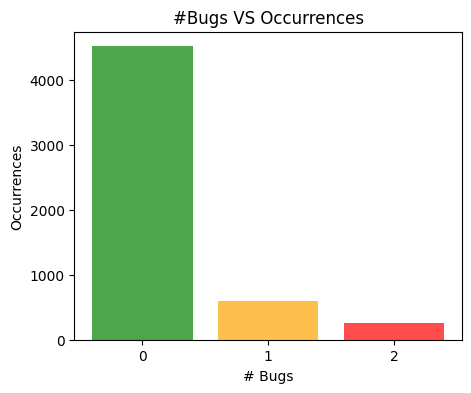

In [ ]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5)
print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
            "Cross Validation", X_cv.shape, y_cv.shape)

Train: (3759, 21) (3759,) Test: (806, 21) (806,) Cross Validation (806, 21) (806,)


Classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13]
Counts: [3139, 436, 98, 40, 21, 7, 5, 4, 4, 2, 1, 1, 1]


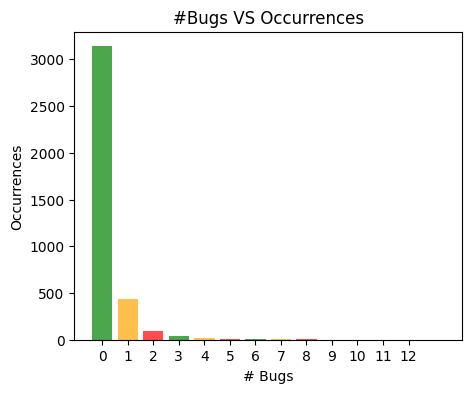

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");


In [ ]:
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

data_for_viz = X_train_scaled.copy()
data_for_viz_unscaled = X_train.copy()

data_for_viz['Bugs'] = y_train.copy().tolist()
data_for_viz_unscaled['Bugs'] = y_train.copy().tolist()

In [ ]:
data_for_viz.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,...,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,Bugs
3849,-0.597396,-0.697666,-0.302486,-0.785206,-0.085945,-0.237201,0.187986,-0.281890,-0.384623,-0.597178,...,-0.378552,0.636613,-0.458176,-0.449531,-0.393262,-0.322344,-0.154545,-0.133966,-0.056591,0
4552,-0.475458,0.034474,-0.302486,-0.516121,-0.079965,-0.237201,-0.372895,-0.231758,-0.344846,-0.318192,...,-0.378552,-0.137901,-0.116131,-0.400020,-0.335716,-0.322344,-0.154545,-0.133966,-0.056591,0
1396,-0.231582,-0.697666,-0.230439,0.022048,-0.064417,-0.237201,-0.232675,-0.281890,-0.049827,-0.039206,...,0.408638,-0.137901,-0.201642,0.085193,-0.091145,-0.322344,-0.154545,-0.133966,-0.056591,0
5021,0.439078,-0.697666,-0.230439,1.367470,-0.069201,-0.237201,-0.022344,-0.281890,-0.036568,-0.108952,...,0.408638,-0.137901,-0.116131,0.233727,-0.235010,-0.322344,-0.154545,-0.133966,-0.056591,0
2463,-0.170613,-0.697666,0.201842,-0.785206,-0.085347,-0.237201,-0.302785,-0.281890,-0.318327,-0.527431,...,-0.378552,-0.137901,-0.372664,-0.409922,-0.292557,-0.322344,-0.154545,-0.133966,-0.056591,0


**CORRELATION MATRIX**

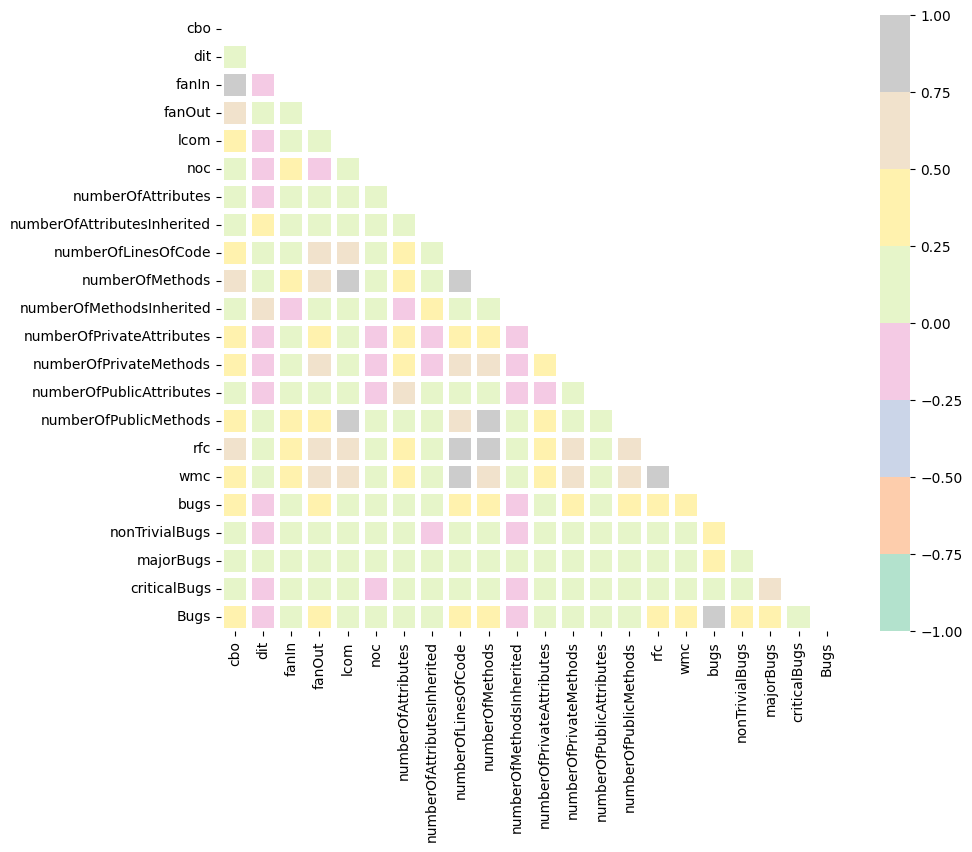

In [ ]:
data_for_viz_unscaled['Bugs'] = y_train.copy().tolist()

data_for_viz.head()

fig, ax = plt.subplots(figsize=(10,8))

corr = data_for_viz.corr()
mask = np.triu(corr)
sns.heatmap(corr, vmin=-1, vmax=1, center= 0, cmap= 'Pastel2', linewidths=3, ax=ax, mask=mask);

**FEATURE IMPORTANCE WITH LINEAR REGRESSION:**

In [ ]:
linear= LinearRegression()
linear.fit(X_train,y_train)
coef=pd.Series(linear.coef_,index = X_train.columns)
print("Discarded Features:", np.sum(linear.coef_==0), "out of", len(X_train.columns))

Discarded Features: 0 out of 21


In [ ]:
coef= coef[coef !=0]

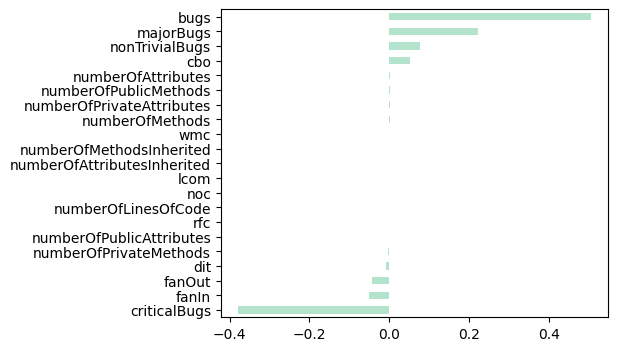

In [ ]:
coef.sort_values().plot(kind='barh', cmap="Pastel2");

**FEATURE IMPORTANCE WITH RANDOM FOREST CLASSIFIER**

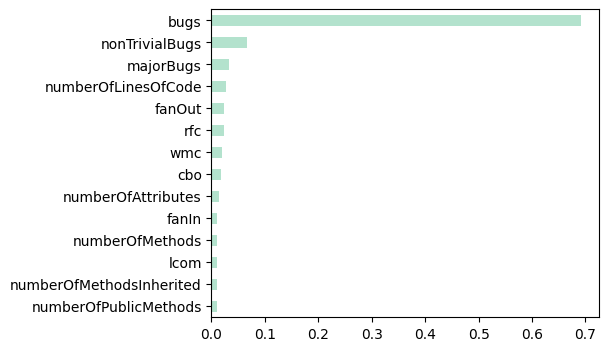

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train);
coef_rfc = pd.Series(rfc.feature_importances_, index = X_train.columns)

preds = rfc.predict(X_train)
coef_rfc.sort_values()[7:].plot(kind='barh', cmap="Pastel2");

In [ ]:
print("accuracy score:", accuracy_score(y_train, preds))


accuracy score: 1.0


**DATA VISUALIZATION**

In [ ]:
data_for_viz_unscaled.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,...,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,nonTrivialBugs,majorBugs,criticalBugs,Bugs
3072,2,2,0,2,3,1,0,2,10.0,3.0,...,0,0.0,2,5.0,3.0,0,0,0,0,0
310,47,1,38,9,1225,4,107,114,3449.0,50.0,...,3,44.0,41,374.0,1169.0,1,0,0,0,1
4212,20,1,2,18,15,0,2,0,173.0,6.0,...,2,0.0,4,75.0,40.0,0,0,0,0,0
4604,1,2,1,0,15,0,2,1,23.0,6.0,...,0,0.0,5,7.0,7.0,0,0,0,0,0
3487,4,3,1,3,21,0,3,0,79.0,7.0,...,1,0.0,6,28.0,24.0,0,0,0,0,0


**PAIR PLOTS(SCATTER)**

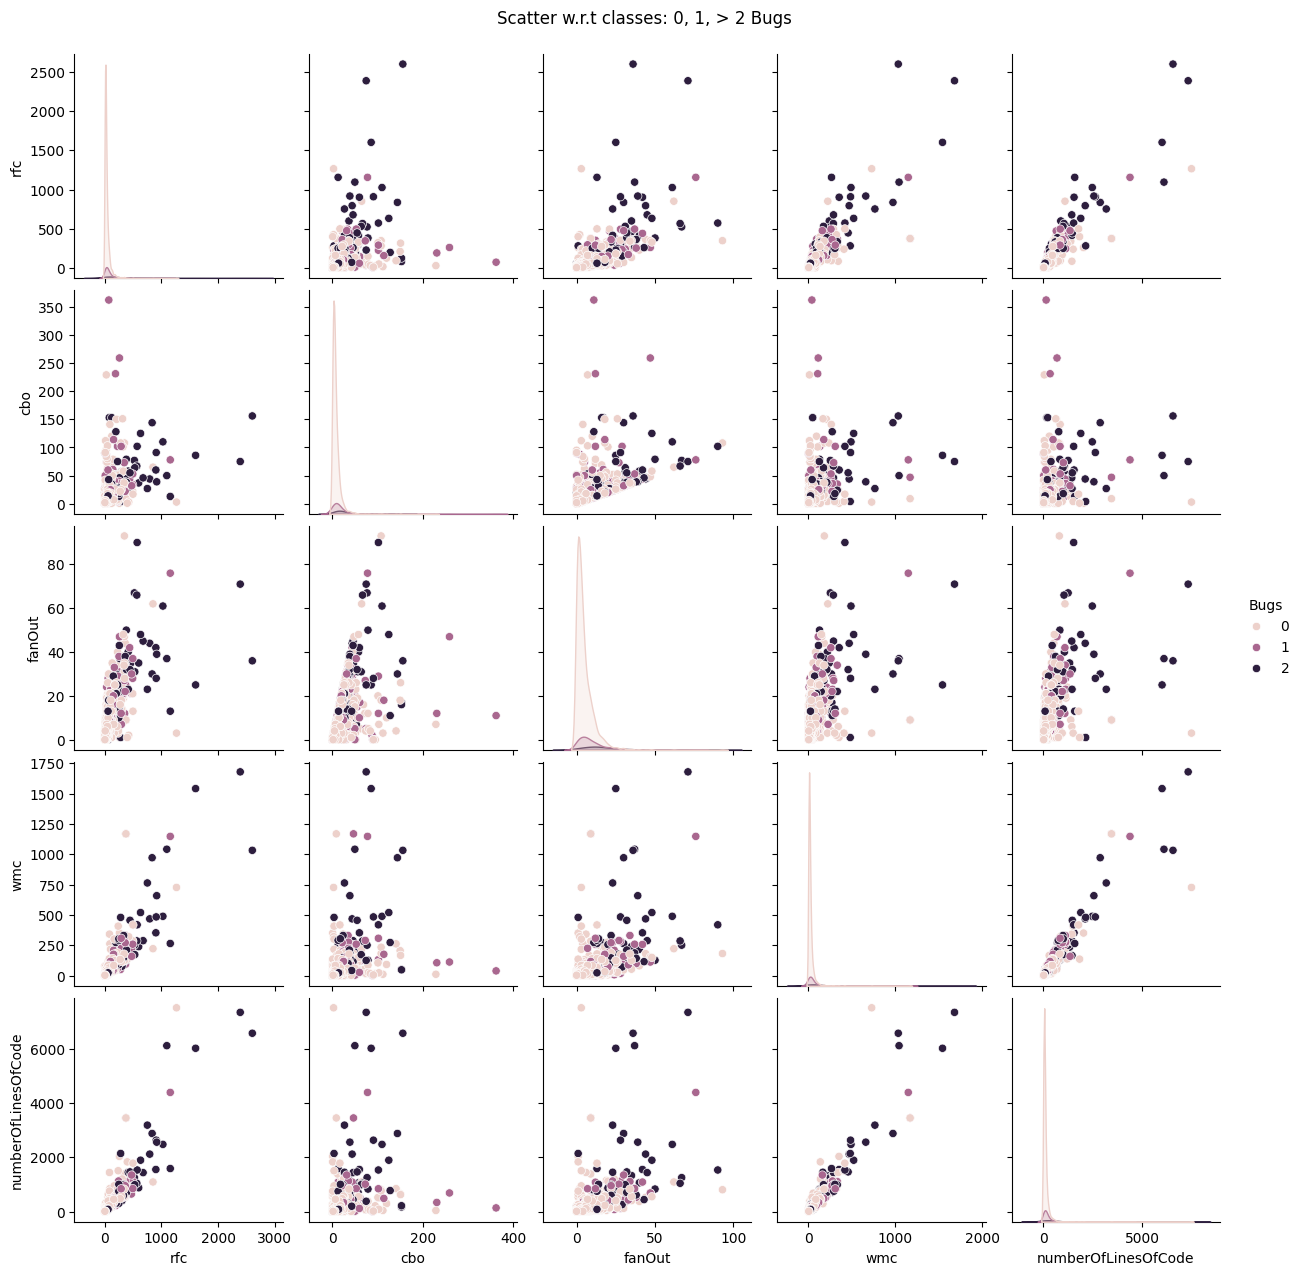

In [ ]:
for_pair_plot = data_for_viz_unscaled[['rfc', 'cbo', 'fanOut','wmc', 'numberOfLinesOfCode', 'Bugs']]
pairplot = sns.pairplot(for_pair_plot, hue="Bugs", vars=['rfc', 'cbo', 'fanOut', 'wmc', 'numberOfLinesOfCode']);
pairplot.fig.suptitle("Scatter w.r.t classes: 0, 1, > 2 Bugs", y=1.02);

**KERNAL DENSITY OF CLASSES WITH RESPECT TO ONE VARIABLE**

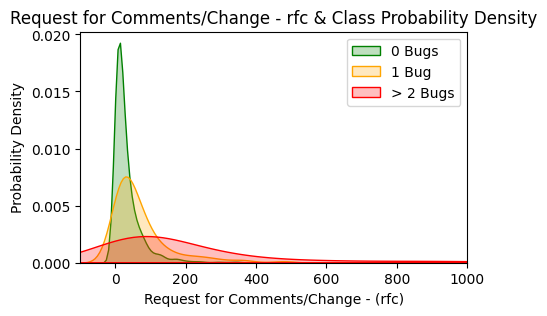

In [ ]:
fig = plt.figure(figsize=(5,3))
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'rfc'], color='g', fill=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'rfc'], color='orange', fill=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'rfc'], color='r', fill=True, label='> 2 Bugs')
plt.xlabel('Request for Comments/Change - (rfc)')
plt.ylabel('Probability Density')
plt.title("Request for Comments/Change - rfc & Class Probability Density")

plt.xlim(-100, 1000);
plt.legend()
plt.show()

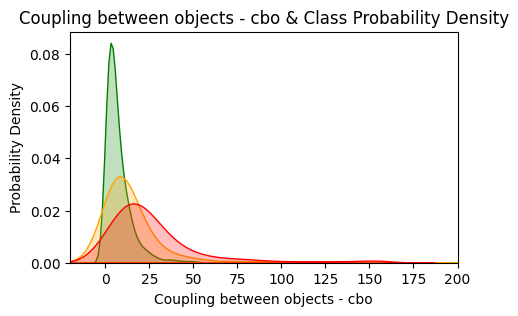

In [ ]:
fig = plt.figure(figsize=(5,3))
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'cbo'], color='g', fill=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'cbo'], color='orange', fill=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'cbo'], color='r', fill =True, label='> 2 Bugs')

plt.xlabel('Coupling between objects - cbo')
plt.ylabel('Probability Density')
plt.title("Coupling between objects - cbo & Class Probability Density")

plt.xlim(-20, 200);

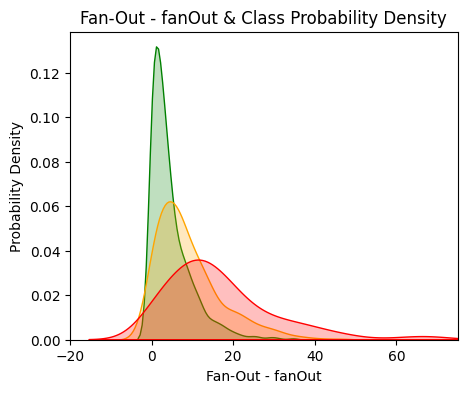

In [ ]:
fig = plt.figure(figsize=(5,4))
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'fanOut'], color='g', fill=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'fanOut'], color='orange', fill=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'fanOut'], color='r', fill =True, label='> 2 Bugs')

plt.xlabel('Fan-Out - fanOut')
plt.ylabel('Probability Density')
plt.title("Fan-Out - fanOut & Class Probability Density")

plt.xlim(-20, 75);

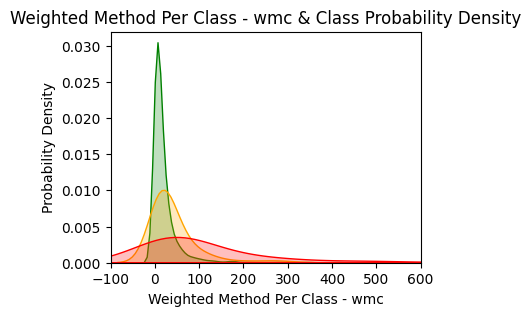

In [ ]:
fig = plt.figure(figsize=(4,3))
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'wmc'], color='g', fill =True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'wmc'], color='orange', fill=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'wmc'], color='r', fill =True, label='> 2 Bugs')

plt.xlabel('Weighted Method Per Class - wmc')
plt.ylabel('Probability Density')
plt.title("Weighted Method Per Class - wmc & Class Probability Density")

plt.xlim(-100, 600);

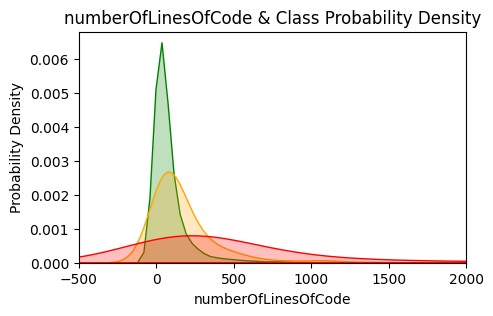

In [ ]:
fig = plt.figure(figsize=(5,3))
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 0), 'numberOfLinesOfCode'], color='g', fill=True, label='0 Bugs')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 1), 'numberOfLinesOfCode'], color='orange', fill=True, label='1 Bug')
sns.kdeplot(data_for_viz_unscaled.loc[(data_for_viz_unscaled['Bugs'] == 2), 'numberOfLinesOfCode'], color='r', fill=True, label='> 2 Bugs')

plt.xlabel('numberOfLinesOfCode')
plt.ylabel('Probability Density')
plt.title("numberOfLinesOfCode & Class Probability Density")
plt.xlim(-500, 2000);

**SCATTER 3D CROSS PLOT**

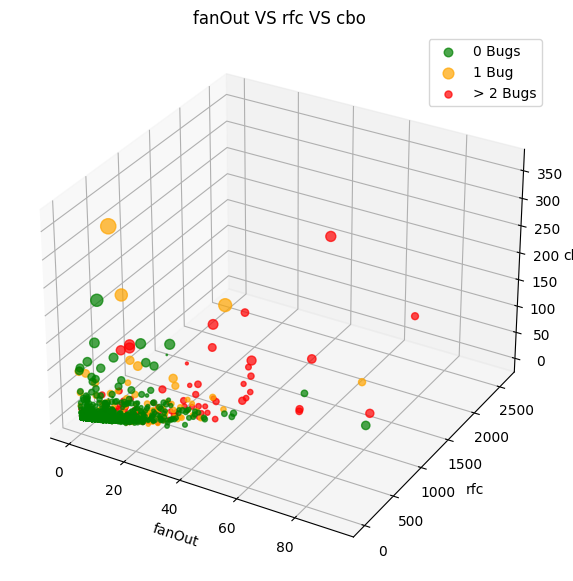

In [ ]:
fig = plt.figure(figsize=(11,7))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 0]['fanOut'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 0]['rfc'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 0]['cbo'], c='g',
           s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['cbo']/3, alpha=0.7, label='0 Bugs')

ax.scatter(data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 1]['fanOut'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 1]['rfc'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 1]['cbo'],
           s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['cbo']/3, alpha=0.7, c='orange', label='1 Bug')

ax.scatter(data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 2]['fanOut'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 2]['rfc'],
           data_for_viz_unscaled[data_for_viz_unscaled['Bugs'] == 2]['cbo'],
           s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['cbo']/3, alpha=0.7, c='r', label='> 2 Bugs')
ax.legend()

ax.set_xlabel('fanOut')
ax.set_ylabel('rfc')
ax.set_zlabel('cbo')
ax.set_title("fanOut VS rfc VS cbo");

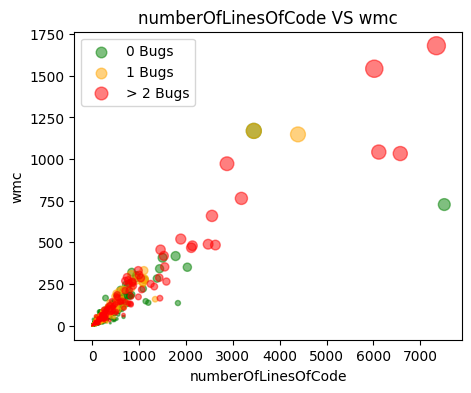

In [ ]:
plt.figure(figsize=(5,4))
plt.scatter(data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['numberOfLinesOfCode'],
            data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['wmc'], label='0 Bugs',
            s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 0]['wmc']/10, c='g',
           alpha=0.5)

plt.scatter(data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['numberOfLinesOfCode'],
            data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['wmc'], label='1 Bugs',
            s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 1]['wmc']/10, c='orange',
           alpha=0.5)

plt.scatter(data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['numberOfLinesOfCode'],
            data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['wmc'], label='> 2 Bugs',
            s=data_for_viz_unscaled[data_for_viz_unscaled["Bugs"] == 2]['wmc']/10, c='r',
           alpha=0.5)

plt.legend()
plt.xlabel('numberOfLinesOfCode')
plt.ylabel('wmc')
plt.title("numberOfLinesOfCode VS wmc");

<ipython-input-35-7cc1dab4118d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Bugs", y="rfc", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])


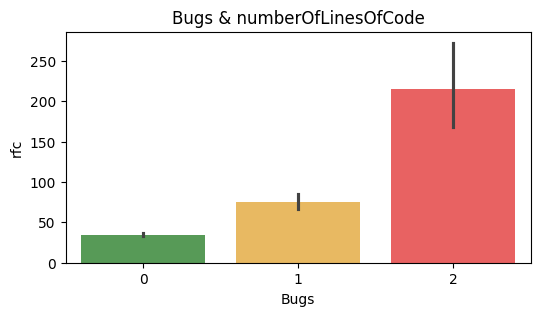

In [ ]:
fig = plt.figure(figsize=(6,3))

ax = sns.barplot(x="Bugs", y="rfc", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & numberOfLinesOfCode");

<ipython-input-36-8f9ef5b8dff9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Bugs", y="cbo", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])


Text(0.5, 1.0, 'Bugs & Coupling Between Obj')

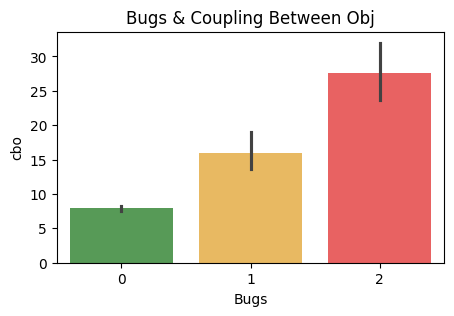

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = sns.barplot(x="Bugs", y="cbo", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & Coupling Between Obj")

<ipython-input-37-68c530dd10d7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Bugs", y="fanOut", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])


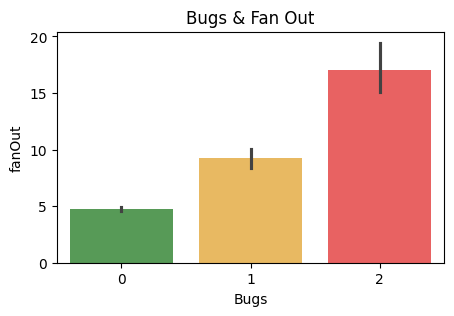

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = sns.barplot(x="Bugs", y="fanOut", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & Fan Out");

<ipython-input-38-873794279143>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Bugs", y="wmc", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])


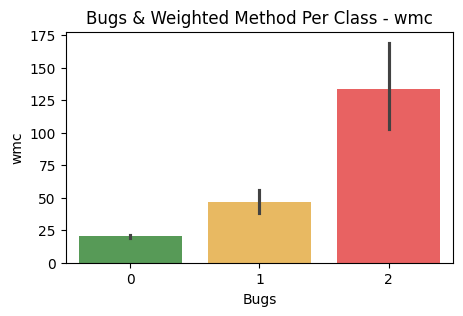

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = sns.barplot(x="Bugs", y="wmc", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & Weighted Method Per Class - wmc");

<ipython-input-39-3fb34fe32d49>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Bugs", y="numberOfLinesOfCode", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])


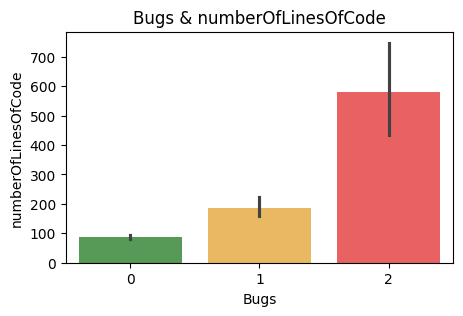

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = sns.barplot(x="Bugs", y="numberOfLinesOfCode", data=for_pair_plot, alpha=0.7, palette=['g', 'orange', 'r'])
plt.title("Bugs & numberOfLinesOfCode");

**CLUSTERING ANALYSIS**

**UMAP Dimensionality reduction algorithm**

In [ ]:
reducer = umap.UMAP(verbose=False)
embedding = reducer.fit_transform(X_train_scaled)
embedding.shape

(3759, 2)

In [ ]:
embedding = pd.DataFrame(embedding)
embedding.head()

,0,1
0,6.103463,-3.542371
1,3.172892,1.997693
2,6.425341,1.053643
3,6.442887,-3.447747
4,2.842400,-2.812664


**K-MEANS PREDICTIONS**

Text(0.5, 1.0, '# Bugs & Software Properties & K-Means Centers | 2D - UMAP')

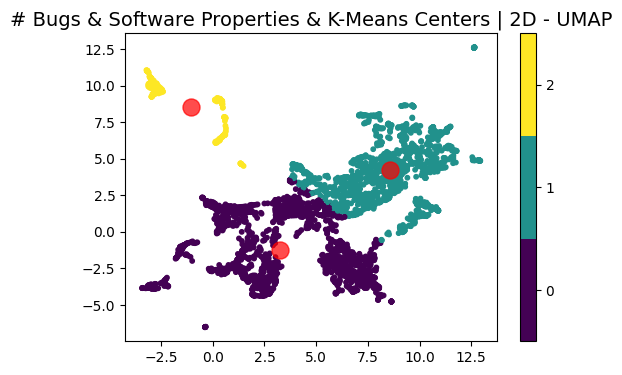

In [ ]:
kmeans_umap = KMeans(n_clusters=3)
kmeans_umap.fit(embedding)
preds_kmeans_umap = kmeans_umap.predict(embedding)

fig, ax = plt.subplots(figsize=(6,4))

plt.scatter(embedding[0], embedding[1], c=preds_kmeans_umap, s=10, cmap='viridis')
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(np.unique(preds_kmeans_umap))

plt.scatter(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1], c='red', s=150, alpha=0.7);

plt.title('# Bugs & Software Properties & K-Means Centers | 2D - UMAP', fontsize=14)

In [ ]:
print("K-Means Accuracy Score:", accuracy_score(preds_kmeans_umap, y_train))

K-Means Accuracy Score: 0.4288374567704177


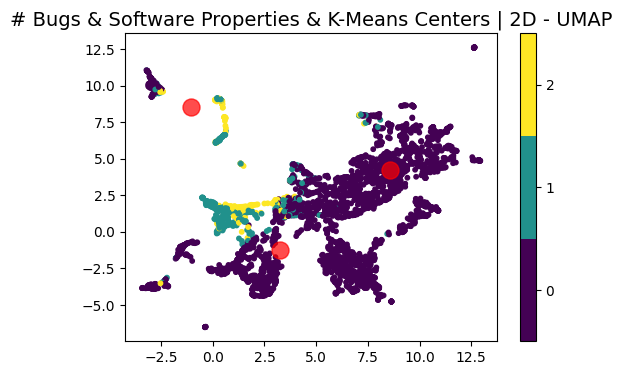

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))

plt.scatter(embedding[0], embedding[1], c=y_train, s=10, cmap='viridis')
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(np.unique(y_train))

plt.scatter(kmeans_umap.cluster_centers_[:, 0], kmeans_umap.cluster_centers_[:, 1], c='red', s=150, alpha=0.7);

plt.title('# Bugs & Software Properties & K-Means Centers | 2D - UMAP', fontsize=14);

**PCA Dimensionality Reduction Algorithm**

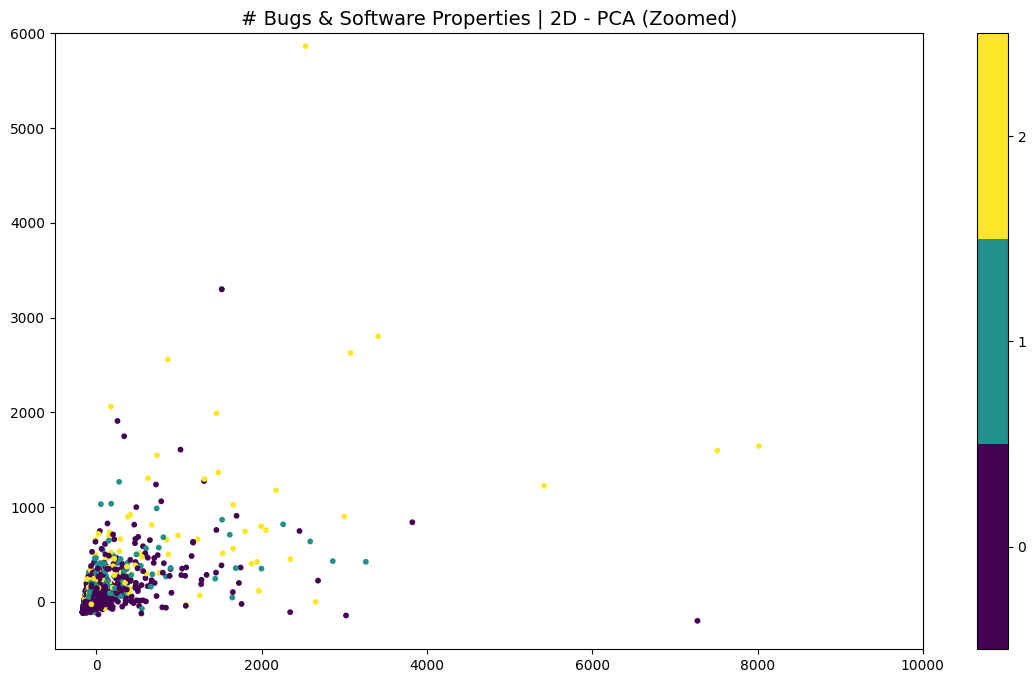

In [ ]:
pca = PCA(n_components=2) #actual values
principalComponents = pca.fit_transform(X_train)

principalComponents = pd.DataFrame(principalComponents)

fig, ax = plt.subplots(figsize=(14,8))

plt.scatter(principalComponents[0], principalComponents[1], c =y_train, s=10, cmap='viridis')
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(np.unique(y_train))
ax.set_xlim(-500, 10000);
ax.set_ylim(-500, 6000);

plt.title('# Bugs & Software Properties | 2D - PCA (Zoomed)', fontsize=14);

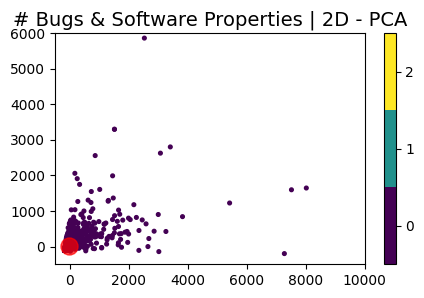

In [ ]:
kmeans_pca = KMeans(n_clusters=3) #not actual values
kmeans_pca.fit(principalComponents)
preds_kmeans_pca = kmeans_pca.predict(principalComponents)

fig, ax = plt.subplots(figsize=(5,3))

plt.scatter(principalComponents[0], principalComponents[1], c=preds_kmeans_pca, s=7, cmap='viridis')
cbar = plt.colorbar(boundaries=np.arange(4)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(np.unique(preds_kmeans_pca))

plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], c='red', s=150, alpha=0.7);

ax.set_xlim(-500, 10000);
ax.set_ylim(-500, 6000);

plt.title('# Bugs & Software Properties | 2D - PCA', fontsize=14);

In [ ]:
print("K-Means Accuracy Score Using PCA:", accuracy_score(preds_kmeans_pca, y_train))

K-Means Accuracy Score Using PCA: 0.842511306198457


**MODELING**

In [ ]:
X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)

print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
      "Cross Validation", X_cv.shape, y_cv.shape)

Train: (3759, 21) (3759,) Test: (806, 21) (806,) Cross Validation (806, 21) (806,)


**Modeling function**

In [ ]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=True, n_jobs=True, pca=None):
    # Create the pipeline steps
    steps = []
    if scale:
        steps.append(('scale', StandardScaler()))
    if pca:
        steps.append(('dim_reduct', PCA(n_components=pca)))
    steps.append(('clf', model()))  # Add classifier as the last step

    pipeline = Pipeline(steps)

    # Perform GridSearchCV
    grid = GridSearchCV(pipeline, param_grid=params, cv=3, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)

    best_parameters = grid.best_params_

    # Create the best model with the best parameters
    model = model(**{k.split('__')[-1]: v for k, v in best_parameters.items()})  # Remove 'clf__' prefix

    # Fit the model to the training data
    model.fit(X_train, y_train)

    print("Best Parameters for model:", best_parameters)
    return {
        "model": model,
        "best_params": best_parameters
    }


**Evaluator function**

In [ ]:
def model_eval(model, X_test, y_test, acc=True, auc_=True, plot_conf=True, plot_auc=True, multi=True, f1=True, prop=False):
    res = [None, None, None]  # Accuracy, AUC, F1-Score
    y_pred = model.predict(X_test)

    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)

    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc

    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('Accuracy:', res[0] * 100, '%')

    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)

        res[1] = roc_auc_score(truth, y_pred_encode, average='macro')
        print('ROC:', res[1] * 100, '%')

    if plot_conf:
        fig, ax = plt.subplots(figsize=(10, 6))
        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap='Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix')

    if plot_auc:
        fig, ax = plt.subplots(figsize=(10, 6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)
            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = {}
        tpr = {}
        auc_of_roc = {}

        n_classes = 1  # Default for binary classification
        if multi:
            n_classes = len(np.unique(y_test))  # Set to number of unique classes

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'Class {i} - area under ROC = {auc_of_roc[i]:.3f}')

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC")
        plt.legend()

    return res


**Under Sampler Function**

In [ ]:
def under_sample(X_train, y_train, n=573):
    train_ = pd.concat([X_train, y_train], axis=1)
    df_0 = train_[train_.iloc[:, -1] == 0].sample(n= n)
    df_1 = train_[train_.iloc[:, -1] == 1].sample(n= n)

    train_ = pd.concat([df_0, df_1], axis=0).sample(frac=1.0)
    X_train_under_sampled = train_.iloc[:, 0:-1]
    y_train_under_sampled = train_.iloc[:, -1]
    return X_train_under_sampled, y_train_under_sampled

 **Base-Line Classifier**

Accuracy: 83.37468982630273 %
ROC: 50.0 %
{'Dummy Classifier | Multi': {'Accuracy': 0.8337468982630273, 'ROC': 0.5, 'F1-Score': 0.30311231393775373}}


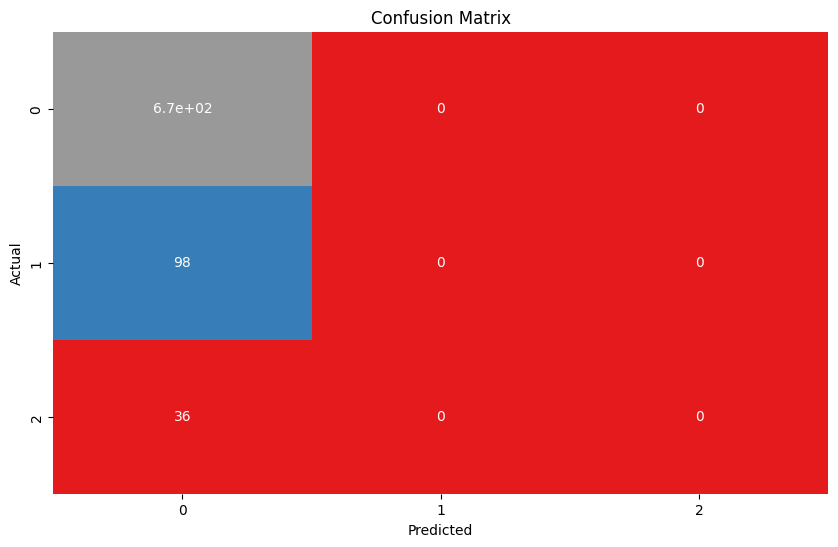

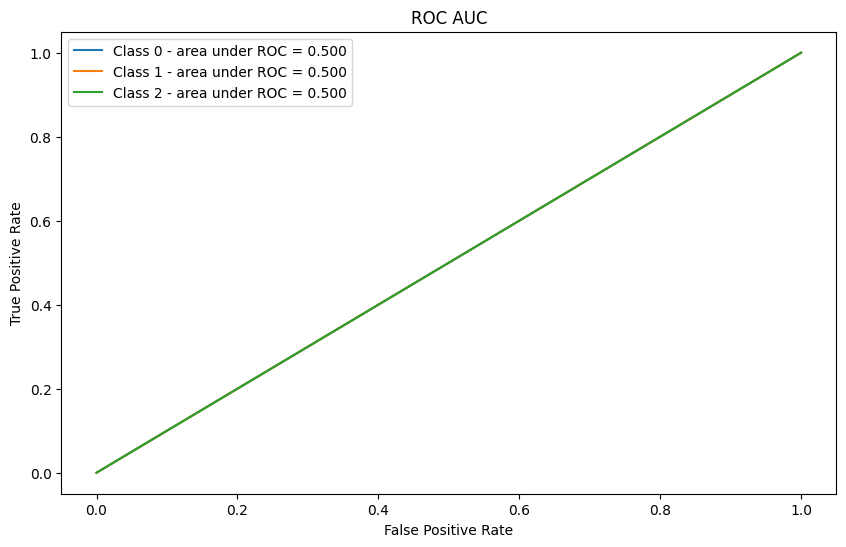

In [ ]:
# Create the pipeline for the DummyClassifier
dmc = Pipeline(steps=[('clf', DummyClassifier(strategy="most_frequent"))])

# Fit the model on the training data
dmc.fit(X_train_scaled, y_train)

# Evaluate the model on the test data using the model_eval function
model_scoring = model_eval(dmc, X_test_scaled, y_test)

# Store the scores in a dictionary
scores = {}
scores["Dummy Classifier | Multi"] = {
    "Accuracy": model_scoring[0],
    "ROC": model_scoring[1],
    "F1-Score": model_scoring[2]
}
model_scoring
print(scores)


**MULTI-CLASSIFIERS**

**Random Forest Classifier**

In [ ]:
# Parameters for the RandomForestClassifier
rfc_params = {
    'clf__n_estimators': [200, 500, 1000],
    'clf__max_depth': [10, 20, 50],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion': ['gini', 'entropy']
}

# Model training
rfc = Modeler(RandomForestClassifier, X_train_scaled, y_train, X_cv, y_cv, rfc_params, scale=True)

Best Parameters for model: {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__max_features': 1.0, 'clf__n_estimators': 200}


Accuracy: 100.0 %
ROC: 100.0 %
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}}


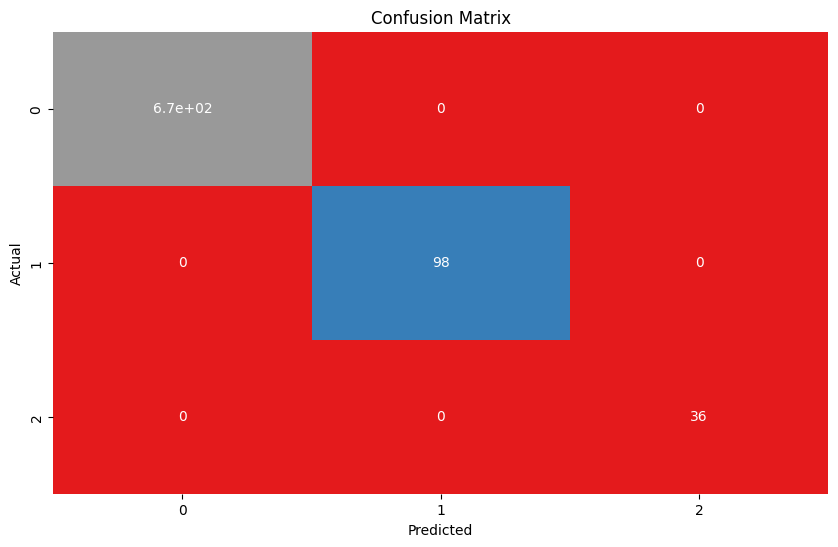

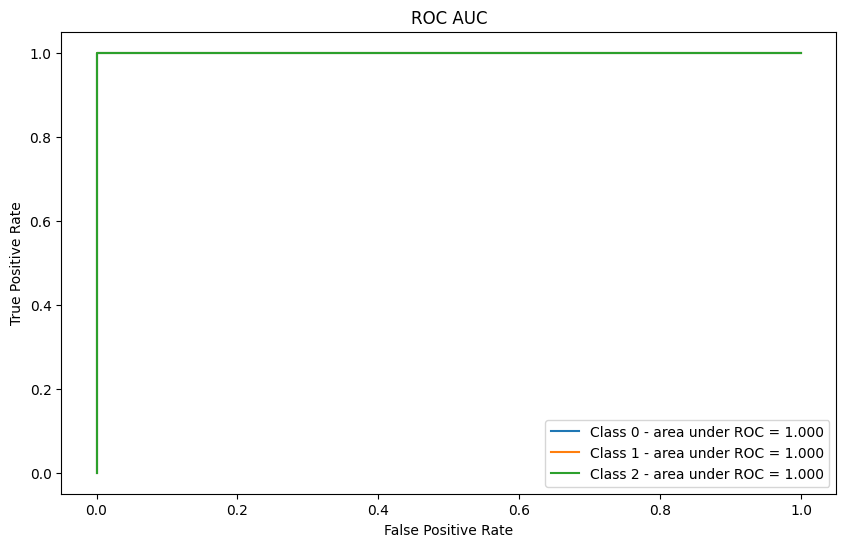

In [ ]:
#Evaluating the model
model_scoring = model_eval(rfc["model"], X_test_scaled, y_test)

# Store the scores for Random Forest with multi-class evaluation
scores = {}
scores["Random Forest | Multi"] = {
    "Accuracy": model_scoring[0],
    "ROC": model_scoring[1],
    "F1-Score": model_scoring[2]
}
model_scoring
print(scores)

**K-Nearest Neighbors**

In [ ]:
# Parameters for K-Nearest Neighbors
knn_params = {
    'clf__n_neighbors': [3, 5, 11, 17],  # Try not to put even numbers
    'clf__weights': ['uniform', 'distance'],
    'clf__metric': ['euclidean', 'manhattan'],
}

# Model training for KNN
knn = Modeler(KNeighborsClassifier, X_train_scaled, y_train, X_cv, y_cv, knn_params, scale=True)

Best Parameters for model: {'clf__metric': 'manhattan', 'clf__n_neighbors': 5, 'clf__weights': 'distance'}


Accuracy: 93.42431761786601 %
ROC: 80.14985795875535 %
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'K-Nearest Neighbor | Multi': {'Accuracy': 0.93424317617866, 'ROC': 0.8014985795875536, 'F1-Score': 0.7716164730149414}}


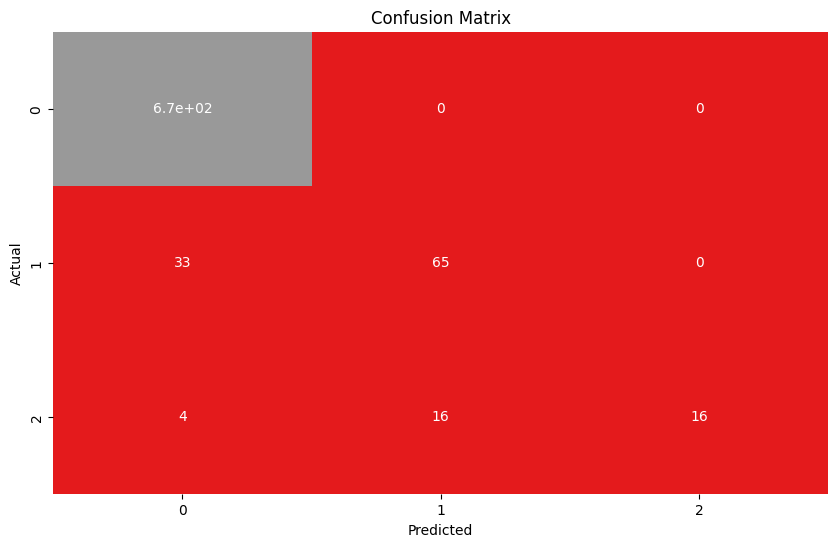

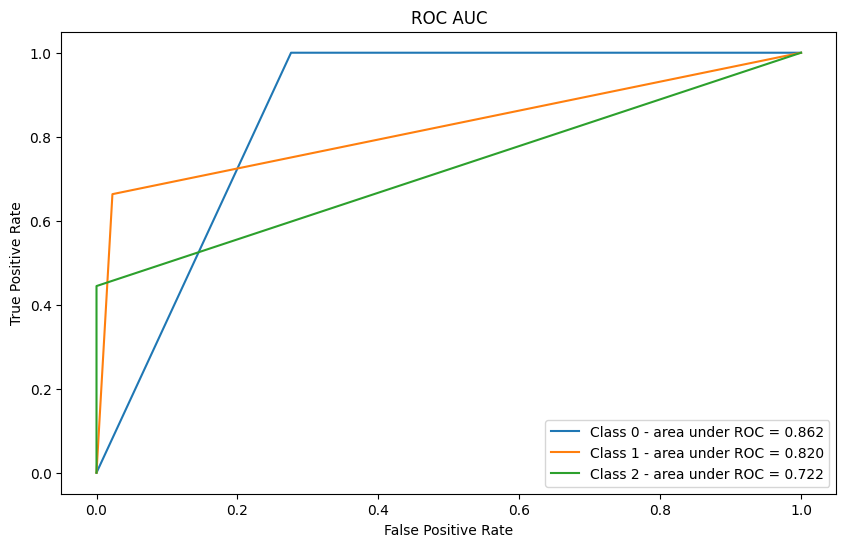

In [ ]:
# Evaluating the KNN model
model_scoring_knn = model_eval(knn["model"], X_test_scaled, y_test)
scores["K-Nearest Neighbor | Multi"] = {
    "Accuracy": model_scoring_knn[0],
    "ROC": model_scoring_knn[1],
    "F1-Score": model_scoring_knn[2]
}
model_scoring
print(scores)

**K-Means**

Accuracy: 81.5136476426799 %
ROC: 63.83917316584865 %
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'K-Nearest Neighbor | Multi': {'Accuracy': 0.93424317617866, 'ROC': 0.8014985795875536, 'F1-Score': 0.7716164730149414}, 'K-Means | Multi': {'Silhouette Score': 0.815136476426799}}


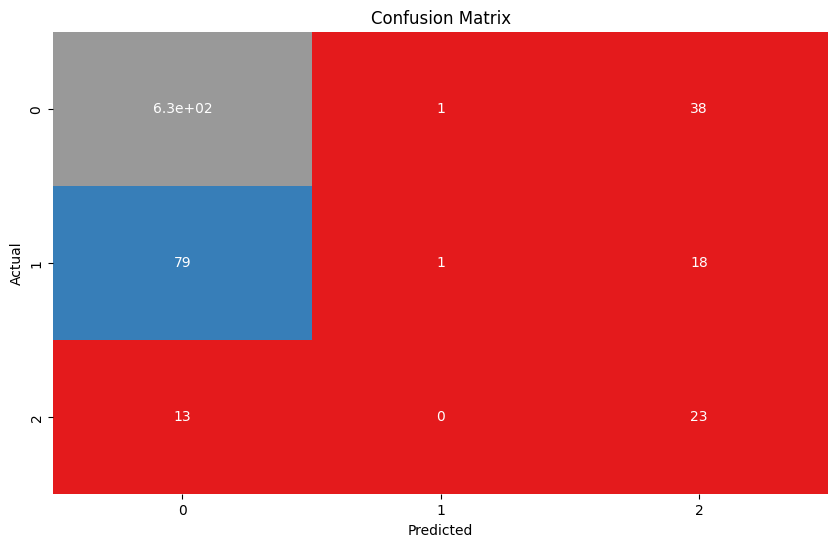

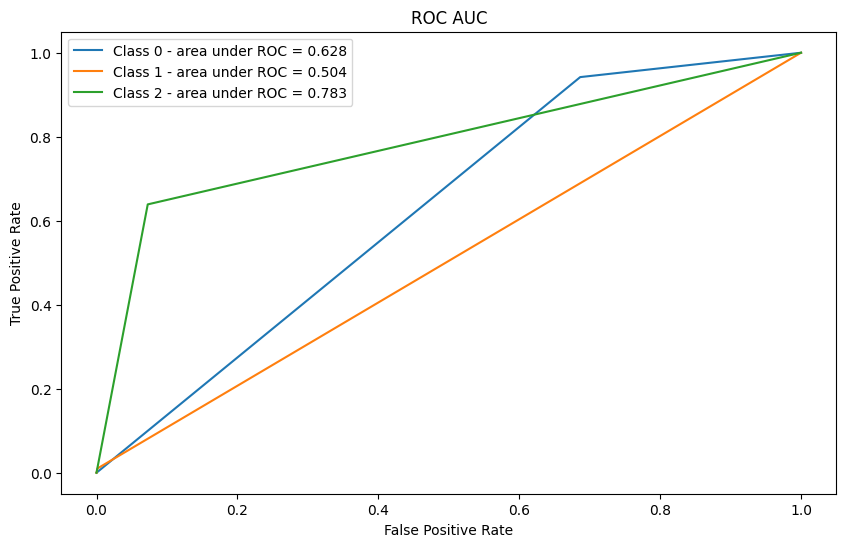

In [ ]:
from sklearn.metrics import confusion_matrix, silhouette_score
from scipy.optimize import linear_sum_assignment
kmeans = {
    "model": KMeans(n_clusters=3, random_state=42)  # Define number of clusters based on dataset
}

# Fit the model on training data
kmeans["model"].fit(X_train_scaled)
model_scoring =model_eval(kmeans["model"], X_test_scaled, y_test)

# Store K-Means results
scores["K-Means | Multi"] = {"Silhouette Score": model_scoring[0]}
model_scoring
print(scores)

**Bagging Classifier**

In [ ]:
bagg_params = {
    'clf__max_samples': [0.3, 0.5, 0.7, 1.0],
    'clf__bootstrap': [True, False],
    'clf__bootstrap_features': [True, False]
}

bagg = Modeler(BaggingClassifier, X_train_scaled, y_train, X_cv, y_cv, bagg_params, scale=True, pca=4)

Best Parameters for model: {'clf__bootstrap': True, 'clf__bootstrap_features': False, 'clf__max_samples': 0.5}


Accuracy: 100.0 %
ROC: 100.0 %
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'K-Nearest Neighbor | Multi': {'Accuracy': 0.93424317617866, 'ROC': 0.8014985795875536, 'F1-Score': 0.7716164730149414}, 'K-Means | Multi': {'Silhouette Score': 0.815136476426799}, 'Bagging Classifier | Multi | PCA': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}}


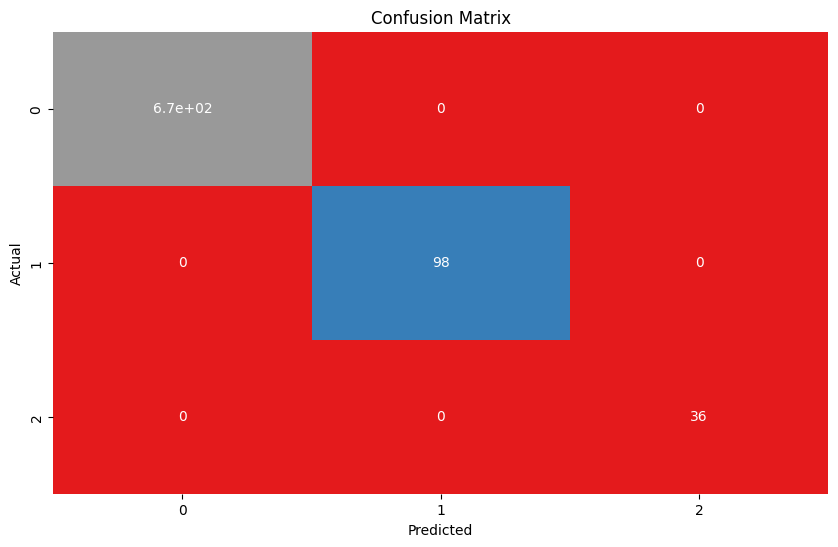

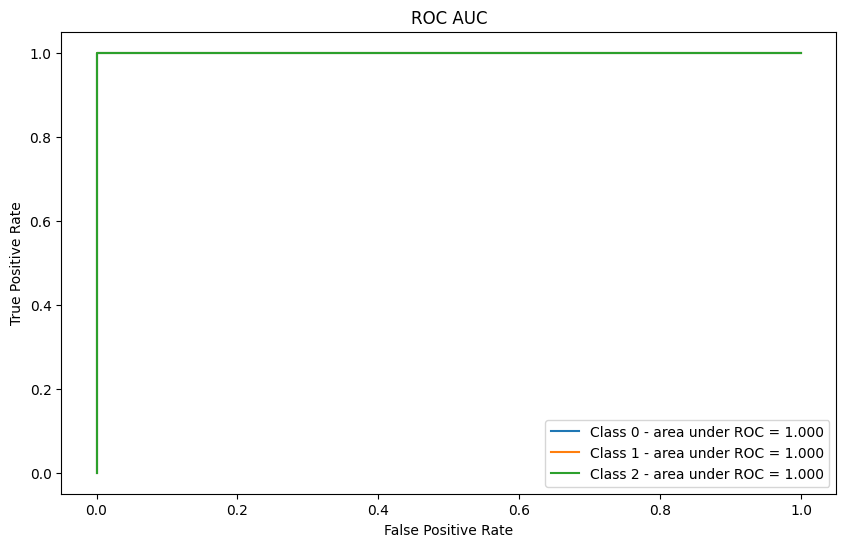

In [ ]:
model_scoring = model_eval(bagg["model"], X_test_scaled, y_test)

scores["Bagging Classifier | Multi | PCA"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring
print(scores)

**Binary-Classifiers**

In [ ]:
# We do not need confusing variables such as the class name; We can use it as an index or leave it.
X_binary = df.iloc[:, 1:-2]
y_binary = df["bugs"]

# Assuming y_binary is a pandas Series
y_binary = np.where(y_binary > 1, 1, y_binary)

# Output the shapes
print("X:", X_binary.shape)
print("y:", y_binary.shape)


X: (5371, 21)
y: (5371,)


Classes: [0, 1]
Counts: [4518, 853]


Text(0, 0.5, 'Occurrences')

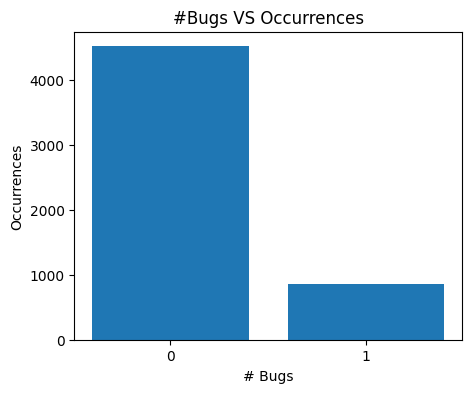

In [ ]:
unique, counts = np.unique(y_binary, return_counts=True)
print("Classes:", unique.tolist())
plt.xlabel("# Bugs");
print("Counts:", counts.tolist())

plt.bar(unique, counts)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3)
X_cv, X_test, y_cv, y_test = train_test_split(X_test, y_test, test_size=0.5)
print("Train:", X_train.shape, y_train.shape,
      "Test:", X_test.shape, y_test.shape,
      "Cross Validation", X_cv.shape, y_cv.shape)

X_train_scaled = pd.DataFrame(StandardScaler().fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(StandardScaler().fit_transform(X_test.values), columns=X_test.columns, index=X_test.index)


Train: (3759, 21) (3759,) Test: (806, 21) (806,) Cross Validation (806, 21) (806,)


**AdaBoost Classifier**

In [ ]:
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_scaled, y_train, X_cv, y_cv, ada_params, scale=True, n_jobs=False)

Best Parameters for model: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 100.0 %
ROC: 100.0 %
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'K-Nearest Neighbor | Multi': {'Accuracy': 0.93424317617866, 'ROC': 0.8014985795875536, 'F1-Score': 0.7716164730149414}, 'K-Means | Multi': {'Silhouette Score': 0.815136476426799}, 'Bagging Classifier | Multi | PCA': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'AdaBoost Classifier | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}}


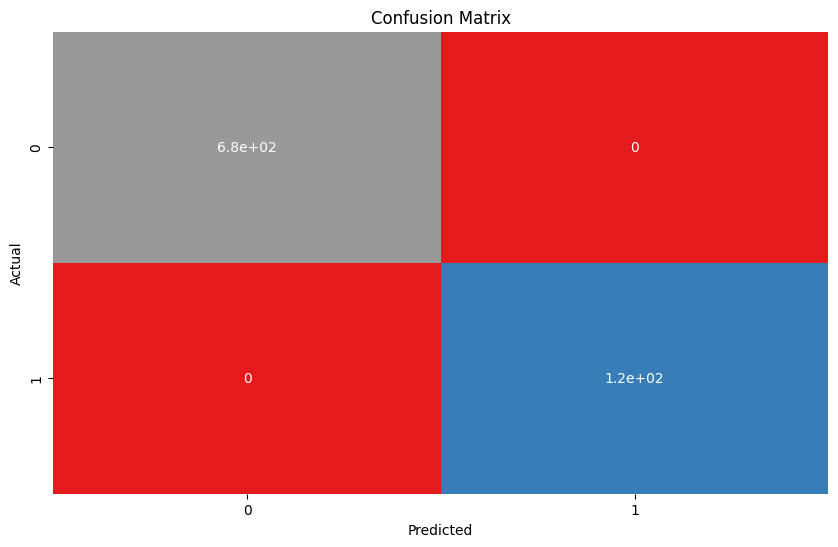

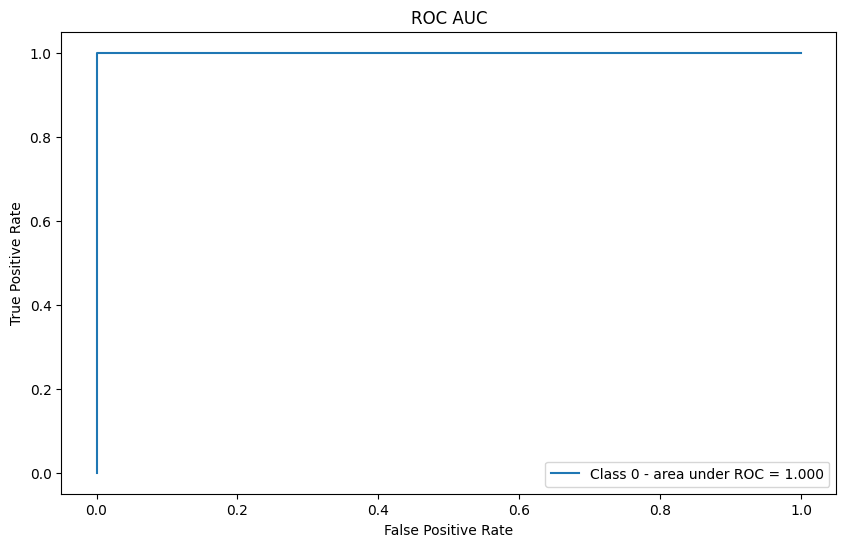

In [ ]:
model_scoring = model_eval(ada["model"], X_test_scaled, y_test, multi=False)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring
print(scores)

**Support-Vector Machine**

In [ ]:
svc_params={
    'clf__C': [0.1,1,10],
    'clf__kernel': ['linear','rbf'],
    'clf__gamma':[1,0.01,0.001]
}
svc= Modeler(SVC,X_train_scaled,y_train,X_cv,y_cv,svc_params,scale=True,n_jobs=False)

Best Parameters for model: {'clf__C': 0.1, 'clf__gamma': 1, 'clf__kernel': 'linear'}


Accuracy: 100.0 %
ROC: 100.0 %
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'K-Nearest Neighbor | Multi': {'Accuracy': 0.93424317617866, 'ROC': 0.8014985795875536, 'F1-Score': 0.7716164730149414}, 'K-Means | Multi': {'Silhouette Score': 0.815136476426799}, 'Bagging Classifier | Multi | PCA': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'AdaBoost Classifier | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Support-Vector Machine | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Bagging Classifier | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Neural Network | Binary': {'Accuracy': 0.9396648044692737, 'ROC': 0.819474320053399, 'F1-Score': 0.5929554611969845}}


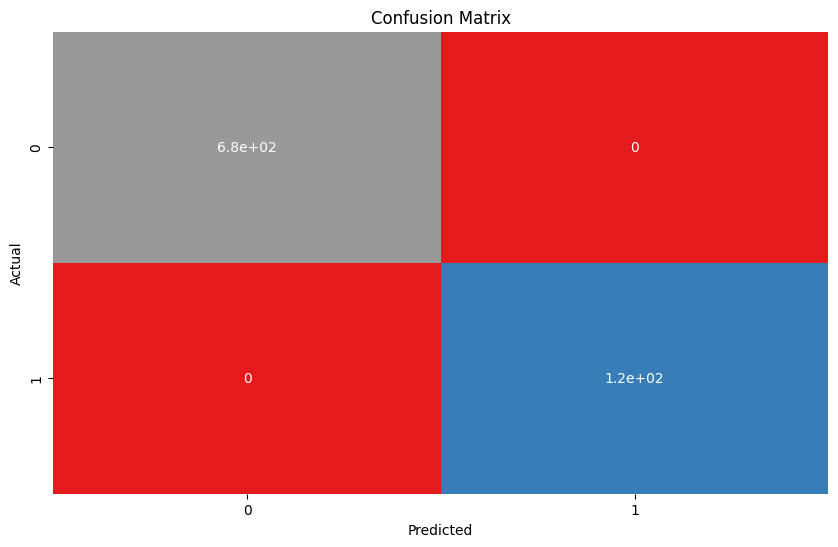

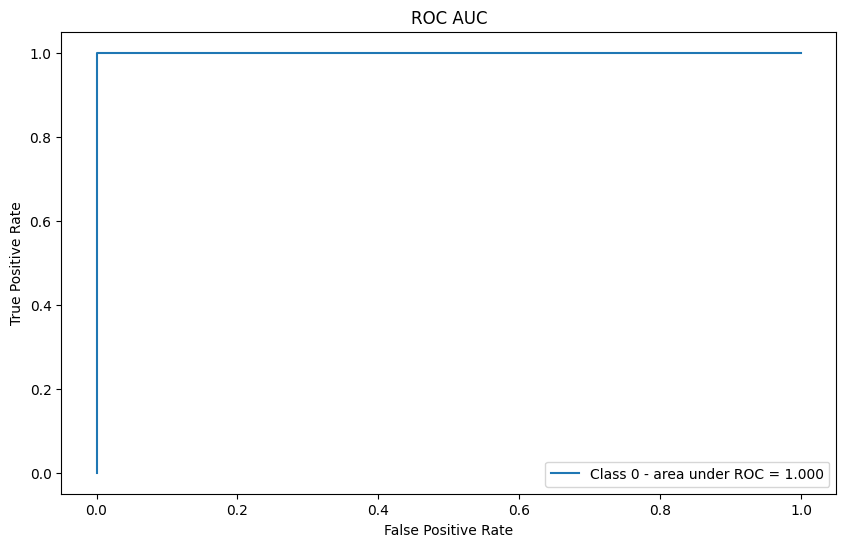

In [ ]:
model_scoring = model_eval(svc["model"], X_test_scaled, y_test, multi=False)
scores["Support-Vector Machine | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring
print(scores)

**Bagging Classifier**

In [ ]:
bagg_params = {
    'clf__max_samples': [0.3, 0.5, 0.7, 1.0],
    'clf__bootstrap': [True, False],
    'clf__bootstrap_features': [True, False]
}

bagg = Modeler(BaggingClassifier, X_train_scaled, y_train, X_cv, y_cv, bagg_params, scale=True)

Best Parameters for model: {'clf__bootstrap': True, 'clf__bootstrap_features': True, 'clf__max_samples': 0.5}


Accuracy: 100.0 %
ROC: 100.0 %
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'K-Nearest Neighbor | Multi': {'Accuracy': 0.93424317617866, 'ROC': 0.8014985795875536, 'F1-Score': 0.7716164730149414}, 'K-Means | Multi': {'Silhouette Score': 0.815136476426799}, 'Bagging Classifier | Multi | PCA': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'AdaBoost Classifier | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Support-Vector Machine | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Bagging Classifier | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}}


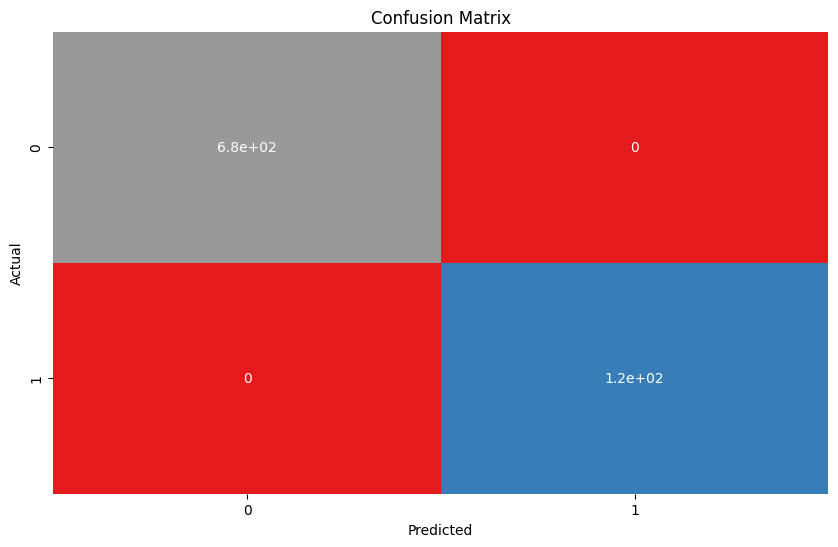

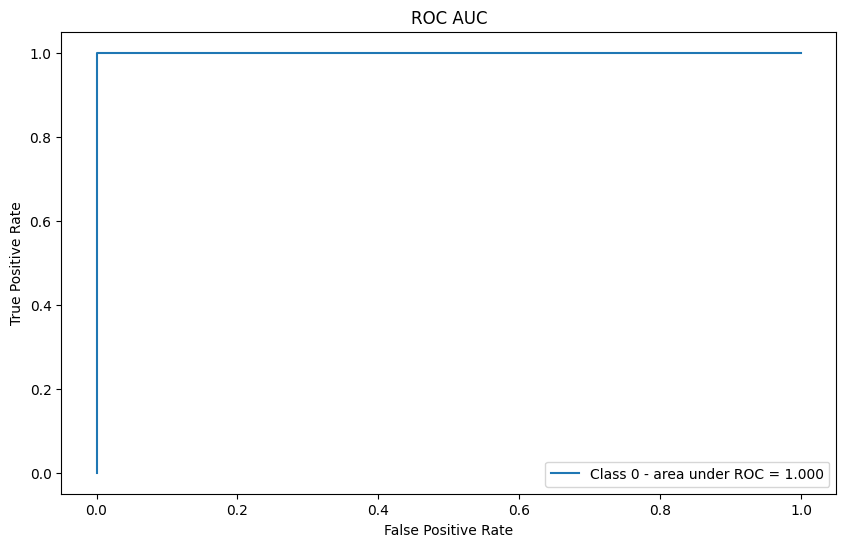

In [ ]:
model_scoring = model_eval(bagg["model"], X_test_scaled, y_test, multi=False)
scores["Bagging Classifier | Binary"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring
print(scores)

**Neural Network**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Neural network model function
def nn_modeler(input_dim, first_layer, second_layer, lr, output_dim):
    model = Sequential()
    model.add(Dense(first_layer, input_dim=input_dim, activation='relu'))
    model.add(Dense(second_layer, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))  # For binary classification

    # Set the learning rate using Adam optimizer
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
X_cv = X.copy()  # Feature set for cross-validation
y_cv = y.copy()  # Labels for cross-validation

NN_scores = {}
n_split = 3
epochs = [30, 50]  # Number of epochs
batch_sizes = [32, 64]  # Batch sizes
first_layers = [30, 50]  # Neurons in the first layer
second_layers = [10, 20]  # Neurons in the second layer
lrs = [0.001, 0.1]  # Learning rates
iters = 0

for epoch in epochs:
    for batch_size in batch_sizes:
        for first_layer in first_layers:
            for second_layer in second_layers:
                for lr in lrs:
                    # K-FOLDS
                    accs = []
                    aurocs = []
                    f1s = []

                    # K-Fold Cross Validation
                    for train_indices, test_indices in StratifiedKFold(n_split).split(X_cv, y_cv):
                        # Use .iloc to access DataFrame rows
                        X_train_fold = X_cv.iloc[train_indices]
                        y_train_fold = y_cv.iloc[train_indices]
                        X_test_fold = X_cv.iloc[test_indices]
                        y_test_fold = y_cv.iloc[test_indices]

                        # Scale the data
                        scaler = StandardScaler()
                        X_train_fold_scaled = pd.DataFrame(scaler.fit_transform(X_train_fold), columns=X_train_fold.columns, index=X_train_fold.index)
                        X_test_fold_scaled = pd.DataFrame(scaler.transform(X_test_fold), columns=X_test_fold.columns, index=X_test_fold.index)

                        # Convert pandas DataFrame to NumPy arrays
                        X_train_fold_scaled = X_train_fold_scaled.values
                        X_test_fold_scaled = X_test_fold_scaled.values

                        # Check input shape
                        print(f"Input shape: {X_train_fold_scaled.shape}")

                        # Define and fit the model (with lr correctly passed in)
                        fcnn = nn_modeler(input_dim=X_train_fold_scaled.shape[1], first_layer=first_layer, second_layer=second_layer, lr=lr, output_dim=1)  # Adjust input_dim dynamically
                        fcnn.fit(X_train_fold_scaled, y_train_fold, epochs=epoch, batch_size=batch_size, verbose=False)

                        # Evaluate the model (assuming you have a model_eval function defined)
                        model_scoring = model_eval(fcnn, X_test_fold_scaled, y_test_fold, plot_auc=False, plot_conf=False, prop=True)
                        accs.append(model_scoring[0])
                        aurocs.append(model_scoring[1])
                        f1s.append(model_scoring[2])

                    # Store results
                    info = f"ep:{epoch} bs:{batch_size} f_lyr:{first_layer} s_lyr:{second_layer} lr:{lr}"
                    NN_scores[info] = {"Accuracy": np.mean(accs), "ROC": np.mean(aurocs), "F1": np.mean(f1s)}

                    # Track iterations
                    iters += 1
                    print(str(iters) + '..', end='')

# Output the final NN_scores dictionary for evaluation
print(NN_scores)


Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 92.01563372417644 %
ROC: 81.07317632920119 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.9608938547486 %
ROC: 81.55966816441197 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.91061452513966 %
ROC: 81.80499446552817 %
1..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.29480737018424 %
ROC: 81.18088850723672 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.24022346368716 %
ROC: 81.66738034244752 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 94.02234636871508 %
ROC: 81.96897444094701 %
2..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.12730318257957 %
ROC: 81.23653163030538 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.56983240223464 %
ROC: 81.40887111516223 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.74301675977654 %
ROC: 81.74036715870686 %
3..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 91.95979899497488 %
ROC: 81.05163389359409 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.68156424581005 %
ROC: 81.45195598637645 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 94.02234636871508 %
ROC: 81.8480793367424 %
4..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.18313791178113 %
ROC: 81.13780363602251 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.68156424581005 %
ROC: 81.45195598637645 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.29608938547486 %
ROC: 81.56802767385 %
5..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.23897264098268 %
ROC: 81.15934607162961 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 95.13966480446928 %
ROC: 82.39982315308917 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.85474860335195 %
ROC: 81.78345202992107 %
6..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.071468453378 %
ROC: 81.0947187648083 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.73743016759776 %
ROC: 81.47349842198355 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.12849162011173 %
ROC: 81.50340036702866 %
7..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.40647682858739 %
ROC: 81.22397337845094 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.56983240223464 %
ROC: 81.40887111516223 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.74301675977654 %
ROC: 81.74036715870686 %
8..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.071468453378 %
ROC: 81.21498919469828 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.24022346368716 %
ROC: 81.66738034244752 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.51396648044692 %
ROC: 81.14553847114587 %
9..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Accuracy: 92.12730318257957 %
ROC: 81.11626120041541 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step
Accuracy: 93.07262569832402 %
ROC: 81.6027530356262 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 94.07821229050279 %
ROC: 81.8696217723495 %
10..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 91.56895589056393 %
ROC: 80.90083684434433 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 92.62569832402234 %
ROC: 81.43041355076933 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Accuracy: 93.24022346368716 %
ROC: 81.5464852382429 %
11..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.29480737018424 %
ROC: 81.18088850723672 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 92.90502793296089 %
ROC: 81.53812572880487 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 93.35195530726257 %
ROC: 81.46867500525246 %
12..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 91.95979899497488 %
ROC: 81.05163389359409 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.90502793296089 %
ROC: 81.53812572880487 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 93.18435754189944 %
ROC: 81.52494280263579 %
13..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 92.071468453378 %
ROC: 81.0947187648083 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 92.68156424581005 %
ROC: 81.45195598637645 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 93.18435754189944 %
ROC: 81.28315259422652 %
14..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 91.95979899497488 %
ROC: 81.05163389359409 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.51396648044692 %
ROC: 81.38732867955513 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.85474860335195 %
ROC: 81.9043471341257 %
15..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.40647682858739 %
ROC: 81.22397337845094 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.40782122905028 %
ROC: 81.73200764926884 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.63128491620112 %
ROC: 81.576387183288 %
16..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.01563372417644 %
ROC: 81.07317632920119 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 93.07262569832402 %
ROC: 81.6027530356262 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.24022346368716 %
ROC: 81.42559013403826 %
17..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.01563372417644 %
ROC: 81.07317632920119 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 95.08379888268156 %
ROC: 82.25738561327742 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.463687150838 %
ROC: 81.5117598764667 %
18..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 91.90396426577331 %
ROC: 81.03009145798697 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 92.56983240223464 %
ROC: 81.40887111516223 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.463687150838 %
ROC: 81.75355008487594 %
19..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 92.12730318257957 %
ROC: 81.11626120041541 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 93.07262569832402 %
ROC: 81.6027530356262 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.68715083798882 %
ROC: 81.83971982730436 %
20..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 91.95979899497488 %
ROC: 81.05163389359409 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.07262569832402 %
ROC: 81.6027530356262 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 93.79888268156424 %
ROC: 81.88280469851858 %
21..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.35064209938582 %
ROC: 81.20243094284383 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 93.12849162011173 %
ROC: 81.6242954712333 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 93.5195530726257 %
ROC: 81.5333023120738 %
22..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 92.01563372417644 %
ROC: 81.07317632920119 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.73743016759776 %
ROC: 81.47349842198355 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.68715083798882 %
ROC: 81.71882472309976 %
23..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 92.57398101619208 %
ROC: 81.28860068527226 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 92.9608938547486 %
ROC: 81.55966816441197 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 93.63128491620112 %
ROC: 81.69728228749264 %
24..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 91.95979899497488 %
ROC: 81.05163389359409 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.68156424581005 %
ROC: 81.45195598637645 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.18435754189944 %
ROC: 81.52494280263579 %
25..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.01563372417644 %
ROC: 81.07317632920119 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.01675977653632 %
ROC: 81.58121060001909 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.29608938547486 %
ROC: 81.20534236123612 %
26..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 91.95979899497488 %
ROC: 81.05163389359409 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.90502793296089 %
ROC: 81.53812572880487 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.63128491620112 %
ROC: 81.81817739169726 %
27..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 91.95979899497488 %
ROC: 81.05163389359409 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.01675977653632 %
ROC: 81.58121060001909 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.35195530726257 %
ROC: 81.46867500525246 %
28..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.01563372417644 %
ROC: 81.07317632920119 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 92.56983240223464 %
ROC: 81.40887111516223 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.35195530726257 %
ROC: 81.58957010945711 %
29..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.68565047459519 %
ROC: 81.09114469670654 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.24022346368716 %
ROC: 81.66738034244752 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 93.07262569832402 %
ROC: 81.36096282721694 %
30..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.071468453378 %
ROC: 81.0947187648083 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.90502793296089 %
ROC: 81.53812572880487 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.24022346368716 %
ROC: 81.42559013403826 %
31..Input shape: (3580, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 92.40647682858739 %
ROC: 80.983432518671 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.12849162011173 %
ROC: 81.6242954712333 %
Input shape: (3581, 21)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 93.96648044692736 %
ROC: 81.9474320053399 %
32..{'ep:30 bs:32 f_lyr:30 s_lyr:10 lr:0.001': {'Accuracy': 0.9296238070135491, 'ROC': 0.8147927965304711, 'F1': 0.5819919049246156}, 'ep:30 bs:32 f_lyr:30 s_lyr:10 lr:0.1': {'Accuracy': 0.9318579240086217, 'ROC': 0.8160574776354373, 'F1': 0.5844623864619822}, 'ep:30 bs:32 f_lyr:30 s_lyr:20 lr:0.001': {'Accuracy': 0.9281338411486358, 'ROC': 0.8146192330139149, 'F1': 0.5804722513464191}, 'ep:30 bs:32 f_lyr:30 s_lyr:20 lr:0.1': {'Accuracy': 0.9288790320316668, 'ROC': 0.8145055640557097, 'F1': 0.5812364922982076}, 'ep:30 bs:32 f_lyr:50 s_lyr:10 lr:0.001': {'Accuracy': 0.9272026384768868, 'ROC': 0.8138592909874965, 'F1': 0.5793040431449287}, 'ep:30 bs:32 f_lyr:50 s_lyr:10 lr:0.1': {'Accuracy': 0.9374446201626797, 'ROC': 0.8178087375154662, 'F1': 0.5907900131475657}, 'ep:30 bs:32 f_lyr:50 s_lyr:20 lr:0.001': {'Accuracy': 0.9264579674702916, 'ROC': 0.813572058512735, 'F1': 0.5785131944710696}, 'ep:30

In [ ]:
NN_scores = pd.DataFrame.from_dict(NN_scores).T
NN_scores = NN_scores.sort_values('ROC', ascending=False)


In [ ]:
NN_scores.iloc[:10,:]

,Accuracy,ROC,F1
ep:30 bs:32 f_lyr:50 s_lyr:10 lr:0.1,0.937445,0.817809,0.590790
ep:50 bs:32 f_lyr:30 s_lyr:10 lr:0.1,0.935210,0.816141,0.588172
ep:30 bs:32 f_lyr:30 s_lyr:10 lr:0.1,0.931858,0.816057,0.584462
ep:30 bs:64 f_lyr:30 s_lyr:10 lr:0.1,0.930927,0.815295,0.583404
ep:50 bs:32 f_lyr:30 s_lyr:20 lr:0.1,0.929624,0.815196,0.582032
ep:50 bs:64 f_lyr:50 s_lyr:20 lr:0.1,0.931671,0.815184,0.584024
ep:50 bs:32 f_lyr:50 s_lyr:20 lr:0.1,0.930554,0.815152,0.582871
ep:50 bs:32 f_lyr:50 s_lyr:10 lr:0.001,0.929438,0.815124,0.581878
ep:30 bs:64 f_lyr:50 s_lyr:20 lr:0.1,0.931485,0.815108,0.583803
ep:30 bs:32 f_lyr:30 s_lyr:10 lr:0.001,0.929624,0.814793,0.581992


In [ ]:
# Check the type of model_scoring before conversion
print("Type of model_scoring before conversion:", type(model_scoring))

# Convert model_scoring to Pandas Series if it's a NumPy array
if isinstance(model_scoring, np.ndarray):
    print("Converting model_scoring from NumPy array to Pandas Series...")
    model_scoring = pd.Series(model_scoring)

print("Type of model_scoring after conversion:", type(model_scoring))

# Assuming model_scoring has the structure [accuracy, roc, f1_score]
scores["Neural Network | Binary"] = {
    "Accuracy": model_scoring[0],   # Accuracy value
    "ROC": model_scoring[1],        # ROC AUC value
    "F1-Score": model_scoring[2]    # F1-Score value
}

# Display the updated scores dictionary
print(scores)


Type of model_scoring before conversion: <class 'list'>
Type of model_scoring after conversion: <class 'list'>
{'Random Forest | Multi': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'K-Nearest Neighbor | Multi': {'Accuracy': 0.93424317617866, 'ROC': 0.8014985795875536, 'F1-Score': 0.7716164730149414}, 'K-Means | Multi': {'Silhouette Score': 0.815136476426799}, 'Bagging Classifier | Multi | PCA': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'AdaBoost Classifier | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Support-Vector Machine | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Bagging Classifier | Binary': {'Accuracy': 1.0, 'ROC': 1.0, 'F1-Score': 1.0}, 'Neural Network | Binary': {'Accuracy': 0.9396648044692737, 'ROC': 0.819474320053399, 'F1-Score': 0.5929554611969845}}


In [ ]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('ROC', ascending=False)

score_df

,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Multi | PCA,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary,1.000000,1.000000,1.000000,NaN
Support-Vector Machine | Binary,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary,1.000000,1.000000,1.000000,NaN
Neural Network | Binary,0.939665,0.819474,0.592955,NaN
K-Nearest Neighbor | Multi,0.934243,0.801499,0.771616,NaN
K-Means | Multi,NaN,NaN,NaN,0.815136


**DATA-DRIVEN MODEL OPTIMIZATION**

**Under Sampling**

**Neural Network**

In [ ]:
def under_sample(X, y, n):
    return X[:n], y[:n]  # Example: Return the first 'n' samples

# Assuming X_train_scaled and y_train are already defined
X_train_under_sampled, y_train_under_sampled = under_sample(X_train_scaled, y_train, n=(y_train == 1).sum())

# Convert to DataFrame or Series if necessary
X_train_under_sampled = pd.DataFrame(X_train_under_sampled)
y_train_under_sampled = pd.Series(y_train_under_sampled)

# Check the shapes and types
print("Shape of X_train_under_sampled:", X_train_under_sampled.shape)
print("Shape of y_train_under_sampled:", y_train_under_sampled.shape)
print("Data types of X_train_under_sampled:")
print(X_train_under_sampled.dtypes)
print("Data type of y_train_under_sampled:", y_train_under_sampled.dtype)

# Define the neural network model
def nn_modeler(input_dim, hidden_units, output_dim, learning_rate):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))  # Hidden layer
    model.add(Dense(output_dim, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and fit the model
fcnn = nn_modeler(input_dim=X_train_under_sampled.shape[1], hidden_units=50, output_dim=1, learning_rate=0.1)

# Fit the model with the under-sampled data
fcnn.fit(X_train_under_sampled, y_train_under_sampled, epochs=30, batch_size=32, verbose=False)


Shape of X_train_under_sampled: (614, 21)
Shape of y_train_under_sampled: (614,)
Data types of X_train_under_sampled:
cbo                            float64
dit                            float64
fanIn                          float64
fanOut                         float64
lcom                           float64
noc                            float64
numberOfAttributes             float64
numberOfAttributesInherited    float64
numberOfLinesOfCode            float64
numberOfMethods                float64
numberOfMethodsInherited       float64
numberOfPrivateAttributes      float64
numberOfPrivateMethods         float64
numberOfPublicAttributes       float64
numberOfPublicMethods          float64
rfc                            float64
wmc                            float64
bugs                           float64
nonTrivialBugs                 float64
majorBugs                      float64
criticalBugs                   float64
dtype: object
Data type of y_train_under_sampled: int64


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_scoring = model_eval(fcnn, X_test_scaled, y_test, plot_auc=False, plot_conf=False,prop =True)
scores["Neural Network |Binary | USam"]= {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 99.13151364764268 %
ROC: 98.82095965908414 %


[0.9913151364764268, 0.9882095965908414, 0.9833759100967332]

**AdaBoost**

In [ ]:
X_cv_under_sampled,y_cv_under_sampled = under_sample(X_cv,y_cv, n=(y_cv== 1).sum())

ada_params = {
    'clf__learning_rate': [0.1,0.5,1.0],
    'clf__n_estimators': [100,200]
}
ada= Modeler(AdaBoostClassifier, X_train_under_sampled,y_train_under_sampled,X_cv_under_sampled,y_cv_under_sampled,
             ada_params,scale = True,n_jobs = False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for model: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
model_scoring = model_eval(bagg["model"], X_test_scaled, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["AdaBoost Classifier | Binary | Usam"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

Accuracy: 100.0 %
ROC: 100.0 %


[1.0, 1.0, 1.0]

**Bagging Classifier**

In [ ]:
bagg_params = {
    'clf__max_samples': [0.3, 0.5, 0.7, 1.0],
    'clf__bootstrap': [True, False],
    'clf__bootstrap_features': [True, False]
}

bagg = Modeler(BaggingClassifier, X_train_under_sampled, y_train_under_sampled, X_cv_under_sampled, y_cv_under_sampled,
               bagg_params, scale=True)

Best Parameters for model: {'clf__bootstrap': True, 'clf__bootstrap_features': True, 'clf__max_samples': 0.7}


In [ ]:
model_scoring = model_eval(bagg["model"], X_test_scaled, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["Bagging Classifier | Binary | Osam"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

Accuracy: 100.0 %
ROC: 100.0 %


[1.0, 1.0, 1.0]

In [ ]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('ROC', ascending=False)

score_df


,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Multi | PCA,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary,1.000000,1.000000,1.000000,NaN
Support-Vector Machine | Binary,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary | Usam,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary | Osam,1.000000,1.000000,1.000000,NaN
Neural Network |Binary | USam,0.991315,0.988210,0.983376,NaN
Neural Network | Binary,0.939665,0.819474,0.592955,NaN
K-Nearest Neighbor | Multi,0.934243,0.801499,0.771616,NaN


**OVER SAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled,y_train_over_sampled = SMOTE().fit_resample(X_train_scaled,y_train)
X_cv_over_sampled,y_cv_over_sampled = SMOTE().fit_resample(X_cv,y_cv)

In [ ]:
X_train_over_sampled = pd.DataFrame(X_train_over_sampled)
X_cv_over_sampled = pd.DataFrame(X_cv_over_sampled)

y_train_over_sampled = pd.Series(y_train_over_sampled)
y_cv_over_sampled = pd.Series(y_cv_over_sampled)

**Neural Network**

In [ ]:
# Define the neural network model
def nn_modeler(input_dim, hidden_units, output_dim, learning_rate):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=input_dim, activation='relu'))  # Hidden layer
    model.add(Dense(output_dim, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Check shapes and data types
print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

# Ensure y_train is in the correct shape for binary classification
if len(y_train.shape) > 1:
    y_train = y_train.ravel()  # Flatten y_train if necessary

# Create and fit the model
fcnn = nn_modeler(input_dim=X_train_scaled.shape[1], hidden_units=50, output_dim=1, learning_rate=1)
fcnn.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=False)


Shape of X_train_scaled: (3759, 21)
Shape of y_train: (3759,)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_scoring = model_eval(fcnn, X_test_scaled, y_test, plot_auc=False, plot_conf=False,prop =True)
scores["Neural Network |Binary | Osam"]= {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 99.87593052109182 %
ROC: 99.92679355783308 %


[0.9987593052109182, 0.9992679355783308, 0.9976094081357239]

**AdaBoost**

In [ ]:
ada_params = {
    'clf__learning_rate': [0.1,0.5,1.0],
    'clf__n_estimators': [100,200]
}
ada= Modeler(AdaBoostClassifier, X_train_over_sampled,y_train_over_sampled,X_cv_over_sampled,y_cv_over_sampled,
             ada_params,scale = True,n_jobs = False)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for model: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
model_scoring = model_eval(ada["model"], X_test_scaled, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["AdaBoost Classifier | Binary | Usam"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring


Accuracy: 100.0 %
ROC: 100.0 %


[1.0, 1.0, 1.0]


**Bagging Classifier**

In [ ]:
bagg_params = {
    'clf__max_samples': [0.3, 0.5, 0.7, 1.0],
    'clf__bootstrap': [True, False],
    'clf__bootstrap_features': [True, False]
}

bagg = Modeler(BaggingClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,
               bagg_params, scale=True)


Best Parameters for model: {'clf__bootstrap': True, 'clf__bootstrap_features': True, 'clf__max_samples': 0.3}


In [ ]:
model_scoring = model_eval(bagg["model"], X_test_scaled, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["Bagging Classifier | Binary | Osam"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

Accuracy: 100.0 %
ROC: 100.0 %


[1.0, 1.0, 1.0]

In [ ]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('ROC', ascending=False)

score_df

,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Multi | PCA,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary,1.000000,1.000000,1.000000,NaN
Support-Vector Machine | Binary,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary | Usam,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary | Osam,1.000000,1.000000,1.000000,NaN
Neural Network |Binary | Osam,0.998759,0.999268,0.997609,NaN
Neural Network |Binary | USam,0.991315,0.988210,0.983376,NaN
Neural Network | Binary,0.939665,0.819474,0.592955,NaN


**With Feature Selection**

In [ ]:
X_train_scaled_featured = X_train_scaled[['rfc', 'cbo', 'fanOut', 'wmc', 'numberOfLinesOfCode']]
X_test_scaled_featured = X_test_scaled[['rfc', 'cbo', 'fanOut', 'wmc', 'numberOfLinesOfCode']]
X_cv_featured = X_cv[['rfc', 'cbo', 'fanOut', 'wmc', 'numberOfLinesOfCode']]

X_train_scaled_featured_underS = X_train_under_sampled[['rfc', 'cbo', 'fanOut', 'wmc', 'numberOfLinesOfCode']]
X_cv_featured_underS = X_cv_under_sampled[['rfc', 'cbo', 'fanOut', 'wmc', 'numberOfLinesOfCode']]

**Neural Network**

In [ ]:
def nn_modeler(input_dim, first_layer, second_layer, lr, output_dim):
       model = Sequential()
       model.add(Dense(first_layer, input_dim=input_dim, activation='relu'))
       model.add(Dense(second_layer, activation='relu'))
       model.add(Dense(output_dim, activation='sigmoid'))

       optimizer = Adam(learning_rate=lr)
       model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
       return model

In [ ]:
fcnn = nn_modeler(5, 50,10,0.1,output_dim=1)
fcnn.fit(X_train_scaled_featured, y_train, epochs=30, batch_size=32, verbose=False)

model_scoring = model_eval(fcnn, X_test_scaled_featured, y_test, plot_auc=False, plot_conf=False, prop=True)
scores["Neural Network | Binary | Featured"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 84.7394540942928 %
ROC: 50.0 %


[0.847394540942928, 0.5, 0.4586971121558093]

In [ ]:
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_scaled_featured, y_train, X_cv_featured, y_cv,
              ada_params, scale=True, n_jobs=False)
model_scoring = model_eval(ada["model"], X_test_scaled_featured, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["AdaBoost Classifier | Binary | Featured"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for model: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Accuracy: 86.10421836228288 %
ROC: 58.1378185670583 %


[0.8610421836228288, 0.581378185670583, 0.6025641025641026]

In [ ]:
bagg_params = {
    'clf__max_samples': [0.3, 0.5, 0.7, 1.0],
    'clf__bootstrap': [True, False],
    'clf__bootstrap_features': [True, False]
}

bagg = Modeler(BaggingClassifier, X_train_scaled_featured, y_train, X_cv_featured, y_cv,
               bagg_params, scale=True)

model_scoring = model_eval(bagg["model"], X_test_scaled_featured, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["Bagging Classifier | Binary | Featured"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

Best Parameters for model: {'clf__bootstrap': True, 'clf__bootstrap_features': True, 'clf__max_samples': 0.5}
Accuracy: 85.35980148883374 %
ROC: 58.031877536930565 %


[0.8535980148883374, 0.5803187753693057, 0.5994980460854332]

**Feature Selection with Under Sampling**

In [ ]:
fcnn = nn_modeler(5, 50, 10, 0.1, 1)
fcnn.fit(X_train_scaled_featured_underS, y_train_under_sampled, epochs=30, batch_size=32, verbose=False)

model_scoring = model_eval(fcnn, X_test_scaled_featured, y_test, plot_auc=False, plot_conf=False, prop=True)
scores["Neural Network | Binary | Featured | USam"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 84.7394540942928 %
ROC: 50.0 %


[0.847394540942928, 0.5, 0.4586971121558093]

In [ ]:
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}
ada = Modeler(AdaBoostClassifier, X_train_scaled_featured_underS, y_train_under_sampled, X_cv_featured_underS, y_cv_under_sampled,
              ada_params, scale=True, n_jobs=False)
model_scoring = model_eval(ada["model"], X_test_scaled_featured, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["AdaBoost Classifier | Binary | Featured | USam"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Best Parameters for model: {'clf__learning_rate': 0.1, 'clf__n_estimators': 100}
Accuracy: 86.35235732009926 %
ROC: 58.28423145139211 %


[0.8635235732009926, 0.5828423145139211, 0.6051342347638644]

In [ ]:
bagg_params = {
    'clf__max_samples': [0.3, 0.5, 0.7, 1.0],
    'clf__bootstrap': [True, False],
    'clf__bootstrap_features': [True, False]
}
bagg = Modeler(BaggingClassifier, X_train_scaled_featured_underS, y_train_under_sampled, X_cv_featured_underS, y_cv_under_sampled,
               bagg_params, scale=True)

model_scoring = model_eval(bagg["model"], X_test_scaled_featured, y_test, multi=False, plot_auc=False, plot_conf=False)
scores["Bagging Classifier | Binary | Featured | USam"] = {"Accuracy": model_scoring[0],
                             "ROC": model_scoring[1],
                             "F1-Score": model_scoring[2]}
model_scoring

Best Parameters for model: {'clf__bootstrap': True, 'clf__bootstrap_features': True, 'clf__max_samples': 0.3}
Accuracy: 85.60794044665012 %
ROC: 59.51148091275934 %


[0.8560794044665012, 0.5951148091275934, 0.6186016154034429]

**Model Quality Metric Table**

In [ ]:
score_df = pd.DataFrame.from_dict(scores).T

multi_clf_scores = score_df[(score_df.index.str.contains('Multi'))]
binary_clf_scores = score_df[(score_df.index.str.contains('Binary') == True)]


**Base-Line**

In [ ]:
score_df[(score_df.index.str.contains('Dummy'))]

,Accuracy,ROC,F1-Score,Silhouette Score


**Multi-Classifiers**

**By accuracy**

In [ ]:
multi_clf_scores.sort_values('Accuracy', ascending=False)


,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Multi | PCA,1.000000,1.000000,1.000000,NaN
K-Nearest Neighbor | Multi,0.934243,0.801499,0.771616,NaN
K-Means | Multi,NaN,NaN,NaN,0.815136


**By ROC**

In [ ]:
multi_clf_scores.sort_values('ROC', ascending=False)


,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Multi | PCA,1.000000,1.000000,1.000000,NaN
K-Nearest Neighbor | Multi,0.934243,0.801499,0.771616,NaN
K-Means | Multi,NaN,NaN,NaN,0.815136


 **By F1-Score**

In [ ]:
multi_clf_scores.sort_values('F1-Score', ascending=False)


,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Multi | PCA,1.000000,1.000000,1.000000,NaN
K-Nearest Neighbor | Multi,0.934243,0.801499,0.771616,NaN
K-Means | Multi,NaN,NaN,NaN,0.815136


**Best in Accuracy**

In [ ]:
multi_clf_scores.sort_values('Accuracy',ascending= False).iloc[:1,:]

,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.0,1.0,1.0,NaN


**Best in ROC**

In [ ]:
multi_clf_scores.sort_values('ROC',ascending= False).iloc[:1,:]

,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.0,1.0,1.0,NaN


**Best in F1-Score**

In [ ]:
multi_clf_scores.sort_values('F1-Score',ascending= False).iloc[:1,:]

,Accuracy,ROC,F1-Score,Silhouette Score
Random Forest | Multi,1.0,1.0,1.0,NaN


**Binary Classifiers**

**By Accuracy**

In [ ]:
binary_clf_scores.sort_values('Accuracy', ascending=False)


,Accuracy,ROC,F1-Score,Silhouette Score
AdaBoost Classifier | Binary,1.000000,1.000000,1.000000,NaN
Support-Vector Machine | Binary,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary | Usam,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary | Osam,1.000000,1.000000,1.000000,NaN
Neural Network |Binary | Osam,0.998759,0.999268,0.997609,NaN
Neural Network |Binary | USam,0.991315,0.988210,0.983376,NaN
Neural Network | Binary,0.939665,0.819474,0.592955,NaN
AdaBoost Classifier | Binary | Featured | USam,0.863524,0.582842,0.605134,NaN
AdaBoost Classifier | Binary | Featured,0.861042,0.581378,0.602564,NaN


**By ROC**

In [ ]:
binary_clf_scores.sort_values('ROC', ascending=False)


,Accuracy,ROC,F1-Score,Silhouette Score
AdaBoost Classifier | Binary,1.000000,1.000000,1.000000,NaN
Support-Vector Machine | Binary,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary | Usam,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary | Osam,1.000000,1.000000,1.000000,NaN
Neural Network |Binary | Osam,0.998759,0.999268,0.997609,NaN
Neural Network |Binary | USam,0.991315,0.988210,0.983376,NaN
Neural Network | Binary,0.939665,0.819474,0.592955,NaN
Bagging Classifier | Binary | Featured | USam,0.856079,0.595115,0.618602,NaN
AdaBoost Classifier | Binary | Featured | USam,0.863524,0.582842,0.605134,NaN


**By F1-Score**

In [ ]:
binary_clf_scores.sort_values('F1-Score', ascending=False)


,Accuracy,ROC,F1-Score,Silhouette Score
AdaBoost Classifier | Binary,1.000000,1.000000,1.000000,NaN
Support-Vector Machine | Binary,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary,1.000000,1.000000,1.000000,NaN
AdaBoost Classifier | Binary | Usam,1.000000,1.000000,1.000000,NaN
Bagging Classifier | Binary | Osam,1.000000,1.000000,1.000000,NaN
Neural Network |Binary | Osam,0.998759,0.999268,0.997609,NaN
Neural Network |Binary | USam,0.991315,0.988210,0.983376,NaN
Bagging Classifier | Binary | Featured | USam,0.856079,0.595115,0.618602,NaN
AdaBoost Classifier | Binary | Featured | USam,0.863524,0.582842,0.605134,NaN
AdaBoost Classifier | Binary | Featured,0.861042,0.581378,0.602564,NaN


**Best in Accuracy**

In [ ]:
binary_clf_scores.sort_values('Accuracy', ascending=False).iloc[:1,:]


,Accuracy,ROC,F1-Score,Silhouette Score
AdaBoost Classifier | Binary,1.0,1.0,1.0,NaN


**Best in ROC**

In [ ]:
binary_clf_scores.sort_values('ROC', ascending=False).iloc[:1,:]

,Accuracy,ROC,F1-Score,Silhouette Score
AdaBoost Classifier | Binary,1.0,1.0,1.0,NaN


**Best in F1-Score**

In [ ]:
binary_clf_scores.sort_values('F1-Score', ascending=False).iloc[:1,:]


,Accuracy,ROC,F1-Score,Silhouette Score
AdaBoost Classifier | Binary,1.0,1.0,1.0,NaN


**Quick illustration of increasing the roc and accuracy**

In [ ]:
from sklearn.ensemble import IsolationForest
isol_forest = IsolationForest(max_samples=X_train.shape[0], contamination=0.005)
isol_forest.fit(X_train, y_train)

preds = isol_forest.predict(X_test)
preds = np.asarray([1 if x == -1 else 0 for x in preds])

print("f1-score:", f1_score(preds, y_test) ,"%")
print("AUC-ROC: ", roc_auc_score(preds, y_test) ,"%")
print("Accuracy:", accuracy_score(preds, y_test) ,"%")
print("pred inliner:", sum(preds == 0))
print("pred outlier:", sum(preds == 1))
print("test inliner:", sum(y_test == 0))
print("test outlier:", sum(y_test == 1))

f1-score: 0.047244094488188976 %
AUC-ROC:  0.8001870324189526 %
Accuracy: 0.8498759305210918 %
pred inliner: 802
pred outlier: 4
test inliner: 683
test outlier: 123


In [ ]:
counter_1 = 0
for pred, act in zip(preds, y_test):
    if pred == act and pred == 1:
        counter_1+=1
print("number of 1's predicted accuratly: ", counter_1)

number of 1's predicted accuratly:  3
